In [2]:
#Needed in general


import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5
import gc

#Quick fudge to make import from ../Scripts work
sys.path.append('../../../Scripts')

#Custom imports
# import ClassCOMPAS     as CC ###
# import ClassFormationChannels as FC a


# import script that has formation channel classification functions:
from PostProcessingScripts import * 
# from ClassFormationChannels_5mainchannels import * 



from astropy import units as u
from astropy import constants as const

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# print(fs)

import astropy
import seaborn as sns
from seaborn_utility import cmap_from_colour

from astropy import units as u
from astropy import constants as c

In [ ]:
# fs=20
# def plot2DdistributionScatter(axe, var, BPSmodelName='A', maskDCOs=None):
    
    
    
    
    
    
#     DCOtype='BBH'
#     # path for files 
#     path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
#     path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

#     # read in data 
#     fdata = h5.File(path)
    
    
    
    
#     M1BH = fdata['doubleCompactObjects']['M1'][...].squeeze()
#     M2BH = fdata['doubleCompactObjects']['M2'][...].squeeze()
#     # M1 will be the most massive, M2 the least massive compact object. 
#     M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
#     Chirpmass = chirpmass(M1, M2)
#     MassRatio = M2/M1

#     ### FOR SPIN ###
    
    
#     seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
#     seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
#     # get only SN seeds for DCOs 
#     maskSNdco = np.in1d(seedsSN,  seedsDCO) 
#     whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
#     whichSN1 = whichSN[::2] # get whichStar for first SN 

#     separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
#     separationPreSN2 = separationPreSN[1::2] # in Rsun. 


#     maskNSBH = ((whichSN1==2) & (M1BH>M2BH) ) | ((whichSN1==1) & (M1BH<M2BH) )  
    
#     mask_temp = ((whichSN1==2) & (M1BH>M2BH) )
#     mask_2 = ((whichSN1==1) & (M1BH<M2BH))
    
#     print('nr of weird reversals = %s'%np.sum(mask_temp))
#     print('nr of normal reversals = %s'%np.sum(mask_2))
    
    
#     if maskDCOs==None:
#         mask_ = np.ones_like(M1BH)
#         COLOR='lightgray'
#     elif maskDCOs=='BH1fromPrimary':
#         mask_ = (maskNSBH==0)
#         COLOR = 'orange'
#     elif maskDCOs=='BH1fromSecondary':
#         mask_ = (maskNSBH==1)
#         COLOR = 'lightskyblue' 
       
    
#     spinBH = QinBHspinmodel(separationPreSN2, M1, M2, maskNSBH)
    
#     ### read in MSSFR weights: ###
#     mssfr = '112' # mssfr that matches LIGO observed rates.
#     # get detected weights
#     fparam_key = 'weights_detected'
#     weightheader = 'w_' + mssfr
#     weights_ = fdata[fparam_key][weightheader][...].squeeze()
        
#     labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
#            r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  'separationPreSN [Rsun]' ] # r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']      
    
    
    
#     M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
#     M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
#     separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
#     Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
#     massRatio = M2ZAMS / M1ZAMS 
    
#     varlist = [M1ZAMS[mask_], M2ZAMS[mask_], separationInitial[mask_], massRatio[mask_], separationPreSN2[mask_]]
#     w = weights_[mask_]
    
#     maskSpin = (spinBH >= 0.1)
# #     maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
# #     maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
#     fs_l = 20 # label fontsize
    

#     LEGEND = True 
#     levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
#     for jj, param_x in enumerate(var):
#         jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

#         for ii, param_y in enumerate(var):

#             ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
#             if ii==jj:
#                 nrbins=np.linspace(jj_minn, jj_maxx, 80)
#                 hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
                
# #                 print(len(varlist[jj][maskSpin]), len(varlist[ii][maskSpin]), w[maskSpin])
# #                 hist, bin_edges = np.histogram(varlist[jj][maskSpin], bins=nrbins, weights=w[maskSpin])
# #                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
# #                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
# #                 axe[ii,jj].plot(xx, yy, color=cGW0, lw=2, zorder=3)   
# #                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
# #                 hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
# #                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
# #                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
# #                 axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
# #                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
#                 ylabel='PDF'
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(0,1)
                
                
#                 # LEGEND inside panel 
# #                 if param_x==r'$q $':
# #                     xx = [-100, -50]
# #                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
# # #                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = r'$\chi > 0.1$')
# # #                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
# # #                     ax[ii,jj].set_legend(fontsize=24, loc='top right')
# #                     ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.7, 0.9), frameon=False)
                    

#                 if jj==(len(var)-1):
#                     ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

#                 if ii!=0:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 
                    
#                 if ii==0:
#                     ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY='PDF', setMinor=False, labelpad=10, fontsize=fs_l)

#             elif jj>ii:
#                 ax[ii,jj].set_axis_off()                    

#             else:
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(ii_minn, ii_maxx)
# #                 if (ii ==4) | (jj==0):
# #                     ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
# #                     ax[ii,jj].scatter(varlist[jj][maskSpin], varlist[ii][maskSpin], s=4400*w[maskSpin], color='orange', zorder=10)
# # #                     ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=4400*w[maskGW200115], color='lightskyblue', zorder=10)
                
#                 NN_ = 100000
        
# #                 print(len(varlist[jj][maskSpin]), len(varlist[ii][maskSpin]), w[maskSpin])
#                 ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
# #                 ax[ii,jj].scatter(varlist[jj][maskSpin], varlist[ii][maskSpin], s=140*w[maskSpin], color='orange', zorder=10)
#                 sns.kdeplot(x=varlist[jj][0:NN_], y=varlist[ii][0:NN_], ax=ax[ii, jj],  color=COLOR, linewidth=3, shade=False, levels=levels, bw_method=0.3, zorder=11)
# #                      ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)

#                 if (ii==(len(var)-1)):
#                     print(ii)
# #                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
#                     ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
#                 if jj==0:
# #                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
#                     ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
#                 else:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 

# #     cmap = cmap_from_colour('gray')
# #     scatter = ax[0,0].scatter(np.ones_like(levels) * 1e-5, np.ones_like(levels) * 1e-21, c=levels, cmap=cmap)
# #     inset_ax = ax[1,2].inset_axes([0.25, 0.5, 1.5, 0.18])
# #     cbar = f.colorbar(scatter, ax=ax[0,1], cax=inset_ax, boundaries=levels, orientation="horizontal")
# #     cbar.set_ticklabels(level_labels)
# #     cbar.ax.tick_params(labelsize=26)                    

# #     axe[1,2].annotate('BBH', xy=(1.0, 0.72), xycoords="axes fraction",
# #                      fontsize=fs+10, color="black", ha="center", va="bottom")  
                    
# ## ALL 
# # labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                      
# # f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
# #                   gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

# # mssfr = '112' # mssfr that matches LIGO observed rates.

# # plt.tight_layout()
# # plt.subplots_adjust(wspace=0, hspace=0)#2)
# # model='P'

# # plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
# # plt.savefig('./Scatter_ZAMS_BH1_from_ALL_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
# # plt.show()




# ## BH1s from Primart 

# labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                      
# f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

# mssfr = '112' # mssfr that matches LIGO observed rates.

# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)#2)
# model='P'

# plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='BH1fromPrimary')
# plt.savefig('./Scatter_ZAMS_BH1_from_Primary_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
# plt.show()



# ############
# ## BH1s from Secondary

# labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                      
# f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

# mssfr = '112' # mssfr that matches LIGO observed rates.

# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)#2)
# model='P'

# plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='BH1fromPrimary')
# plt.savefig('./Scatter_ZAMS_BH1_from_Secondary_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight", dpi=300)
# plt.show()

In [ ]:
print(2)

In [ ]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A', maskDCOs=None):
    
    
    DCOtype='BBH'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    
    
    M1BH = fdata['doubleCompactObjects']['M1'][...].squeeze()
    M2BH = fdata['doubleCompactObjects']['M2'][...].squeeze()
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1

    ### FOR SPIN ###
    seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
    seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
    # get only SN seeds for DCOs 
    maskSNdco = np.in1d(seedsSN,  seedsDCO) 
    whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
    whichSN1 = whichSN[::2] # get whichStar for first SN 

    separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
    separationPreSN2 = separationPreSN[1::2] # in Rsun. 

    # the second SN is the most massive BH 
    maskSN2isM1 = ((whichSN1==2) & (M1BH>M2BH) ) | ((whichSN1==1) & (M1BH<M2BH) )  
    
    mask_temp = ((whichSN1==2) & (M1BH>M2BH) )
    mask_2 = ((whichSN1==1) & (M1BH<M2BH))
    
    print('nr of weird reversals = %s'%np.sum(mask_temp))
    print('nr of normal reversals = %s'%np.sum(mask_2))
    
    # BH1 is the most massive BH in the binary
    if maskDCOs==None:
        mask_ = np.ones_like(M1BH)
        COLOR='lightgray'
        label = 'all BHs'
    elif maskDCOs=='BH1formedFirst':
        mask_ = (maskSN2isM1==0)
        COLOR_ = 'orange'
        label = 'M1 formed in SN1'
    elif maskDCOs=='BH1formedSecond':
        mask_ = (maskSN2isM1==1)
        COLOR_ = 'lightskyblue' 
        label = 'M1 formed in SN2'
       
    
    spinBH = QinBHspinmodel(separationPreSN2, M1, M2, maskSN2isM1)
    
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    weights_ = fdata[fparam_key][weightheader][...].squeeze()
        
        
        
        
    labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
           r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  'separationPreSN [Rsun]' ] # r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']      
    
    
    
    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
    Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
    massRatio = M2ZAMS / M1ZAMS 
    
#     varlist = [M1ZAMS[mask_], M2ZAMS[mask_], separationInitial[mask_], massRatio[mask_],]
#     w = weights_[mask_]
    
    


    
    
    labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH from ZAMS M1}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH from ZAMS M2}} \ [\rm{M}_{\odot}]$',\
           r'$q $',  r'$\log(\rm{separationPreSN}) \, [\rm{R}_{\odot}]$' ] #,  r'$\log_{10}(t) $']              
    varlist = [Chirpmass, M1BH, M2BH, MassRatio,   np.log10(separationPreSN2)]
    w = weights_
    
    maskSpin = (spinBH >= 0.1)
#     maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
#     maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
    fs_l = 20 # label fontsize
    

    LEGEND = True 
    levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    level_labels = [r"$98\%$", r"$90\%$", r"$75\%$", r"$50\%$", r"$25\%$", r"$10\%$", r"$0\%$"]
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 80)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
                
                
                
                # Masked BBHs 
                hist, bin_edges = np.histogram(varlist[jj][mask_], bins=nrbins, weights=w[mask_])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=COLOR_, lw=2, zorder=3)   
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=COLOR_, zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
                
                
                # LEGEND inside panel 
#                 if param_x==r'$q $':
#                     xx = [-100, -50]
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
# #                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = r'$\chi > 0.1$')
# #                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
# #                     ax[ii,jj].set_legend(fontsize=24, loc='top right')
#                     ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.7, 0.9), frameon=False)
                    

                if jj==(len(var)-1):
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 
                    
                if ii==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY='PDF', setMinor=False, labelpad=10, fontsize=fs_l)

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
#                 if (ii ==4) | (jj==0):
#                     ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
#                     ax[ii,jj].scatter(varlist[jj][maskSpin], varlist[ii][maskSpin], s=4400*w[maskSpin], color='orange', zorder=10)
# #                     ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=4400*w[maskGW200115], color='lightskyblue', zorder=10)
                
                NN_ = 100000
        
#                 print(len(varlist[jj][maskSpin]), len(varlist[ii][maskSpin]), w[maskSpin])
                ax[ii,jj].scatter(varlist[jj][:NN_], varlist[ii][:NN_], s=140*w[:NN_], color='lightgray', zorder=1)
                ax[ii,jj].scatter(varlist[jj][mask_][:NN_], varlist[ii][mask_][:NN_], s=140*w[mask_][:NN_], color=COLOR_, zorder=10)
#                 sns.kdeplot(x=varlist[jj][0:NN_], y=varlist[ii][0:NN_], ax=ax[ii, jj],  color=COLOR, linewidth=3, shade=True, levels=levels, bw_method=0.3, zorder=11)
#                      ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)

                if (ii==(len(var)-1)):
                    print(ii)
#                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                if jj==0:
#                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 

    cmap = cmap_from_colour(COLOR_)
    scatter = axe[0,0].scatter(np.ones_like(levels) * 1e-5, np.ones_like(levels) * 1e-21, c=levels, cmap=cmap)
    inset_ax = axe[1,2].inset_axes([0.25, 0.5, 1.5, 0.18])
    cbar = f.colorbar(scatter, ax=axe[0,1], cax=inset_ax, boundaries=levels, orientation="horizontal")
    cbar.set_ticklabels(level_labels)
    cbar.ax.tick_params(labelsize=26)                    

    axe[1,2].annotate(label, xy=(1.0, 0.72), xycoords="axes fraction",
                     fontsize=fs+10, color="black", ha="center", va="bottom")  
                    
## ALL 
# labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                      
# f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

# mssfr = '112' # mssfr that matches LIGO observed rates.

# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)#2)
# model='P'

# plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
# plt.savefig('./Scatter_ZAMS_BH1_from_ALL_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
# plt.show()




## BH1s from Primart 

labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                      
f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='BH1formedFirst')
plt.savefig('./Scatter_Final_BH1_formed_first_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()



############
## BH1s from Secondary

labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                      
f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='BH1formedSecond')
plt.savefig('./Scatter_Final_BH1_formed_second_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight", dpi=300)
plt.show()

In [ ]:
P = convert_a_to_P_circular(separation=10*u.R_sun, M1=10*u.M_sun, M2=10*u.M_sun)
print(P.to(u.day).value<1)


# Zoom in on MBH1 vs MBH2 plot: 

In [ ]:
def function_f_Bavera21(m_WR, c1, c2, c3):
    """
    m_WR with units using astropy
    
    
    """
    
    
    
    top = -c1
    bottom = c2 + np.exp(-c3*m_WR.to(u.Msun).value)
    
    f = top/bottom

    
    return f 



def calculate_alpha_beta_Bavera21(m_WR, c1_alpha, c2_alpha, c3_alpha,  c1_beta,  c2_beta,  c3_beta):
    
    
    alpha = function_f_Bavera21(m_WR, c1_alpha, c2_alpha, c3_alpha)
    beta  = function_f_Bavera21(m_WR, c1_beta,  c2_beta,  c3_beta)
    
    return alpha, beta


def calculate_BH_spin_Bavera21(m_WR, period, maskBH2):
    """
    based on Eq 1 and 2 from https://arxiv.org/pdf/2105.09077.pdf
    
    
    """
 
    # numerical coefficients form text below Eq 2
    # we use the values at helium depletion, since we later on use the C/O core mass. 
    c1_alpha, c2_alpha, c3_alpha =  0.059305, 0.035552, 0.270245
    c1_beta,  c2_beta, c3_beta   =  0.026960, 0.011001, 0.420739
    
    alpha, beta = calculate_alpha_beta_Bavera21(m_WR, c1_alpha, c2_alpha, c3_alpha,  c1_beta,  c2_beta,  c3_beta)
    print(alpha, beta)
    
    
    # make array with zeroes with length similar to input
    print(m_WR)
    a_BH2 = np.zeros(len(m_WR.value))

    
    print(period.value)
    maskBH2_and_P_below_1Day = (maskBH2==1) & (np.asarray(period.value) <= 1)
    print(maskBH2_and_P_below_1Day)
    
    
    
    # if they formed second, update the BH spin with the Bavera spin 
    print('inside function', len(period), len(maskBH2_and_P_below_1Day), len(period[maskBH2_and_P_below_1Day].to(u.d).value))
    
#     print((len(alpha) * (np.log10(period[maskBH2_and_P_below_1Day].to(u.d).value))**2))
    first_term = (alpha[maskBH2_and_P_below_1Day] * (np.log10(period[maskBH2_and_P_below_1Day].to(u.d).value))**2) 
#     print('first = ', first_term)
#     print(period[maskBH2_and_P_below_1Day].to(u.d).value)
    second_term =  ( beta[maskBH2_and_P_below_1Day] * np.log10(period[maskBH2_and_P_below_1Day].to(u.d).value))  
    
#     print(len(first_term))
#     print(len(second_term))
#     print(len( first_term  + second_term))
#     print(a_BH2[maskBH2_and_P_below_1Day])
    a_BH2[maskBH2_and_P_below_1Day]  =  first_term  + second_term  
    
    return a_BH2




    
    
    
    
    

In [ ]:
fs=20
import math 



def plotqlines(ax, qlist, qtextvalue):
    """qlist = [5., 3.333333334, 2., 1.]"""
    ## Add constant mass ratio lines 
    x_q = np.linspace(1,40) # Msun, M1 range
    # plot a few fixed mass ratios:
#     xmin = 1 
    xmin, xmax = 1, 40 
    ymin, ymax = 1, 40
    for ind_q, qvalue in enumerate(qlist):
        y_q =  x_q / qvalue


        y_text = 28 # Msun 
        if y_text*qvalue < 40:
            x_text = y_text * qvalue 
        else: 
            x_text = 30.
            y_text = x_text / qvalue

        # I am calculating the angle theta for the text: (see notes on this)
        delta_y = ((y_text - ymin) / (ymax-ymin)) 
        delta_x = ((x_text - xmin*qvalue) / (xmax-xmin))
        ratio = delta_y / delta_x
        theta_angle = math.degrees(math.atan((ratio)))

        ax.plot(x_q, y_q, c='k', lw=2, linestyle =':')
        ax.text(x_text, y_text, s=r'$q_{\rm{f}} =$ %s '%qtextvalue[ind_q], fontsize=24, \
                       horizontalalignment='center', verticalalignment='bottom', rotation=theta_angle)   

        
        




def plot2DdistributionScatter_ZOOM(axe, var, BPSmodelName='A', maskDCOs=None):
    
    
    DCOtype='BBH'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    
    
    M1BH = fdata['doubleCompactObjects']['M1'][...].squeeze()
    M2BH = fdata['doubleCompactObjects']['M2'][...].squeeze()
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1

    ### FOR SPIN ###
    seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
    seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
    # get only SN seeds for DCOs 
    maskSNdco = np.in1d(seedsSN,  seedsDCO) 
    whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
    whichSN1 = whichSN[::2] # get whichStar for first SN 
    

    separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
    separationPreSN2 = separationPreSN[1::2] # in Rsun. 
    MassCOCoreSN = fdata['supernovae']['MassCOCoreSN'][...].squeeze()[maskSNdco][1::2]  
    
    # the second SN is the most massive BH 
    maskSN2isM1 = ((whichSN1==2) & (M1BH>M2BH) ) | ((whichSN1==1) & (M1BH<M2BH) )  
    
    mask_temp = ((whichSN1==2) & (M1BH>M2BH) )
    mask_2 = ((whichSN1==1) & (M1BH<M2BH))
    
    print('nr of weird reversals = %s'%np.sum(mask_temp))
    print('nr of normal reversals = %s'%np.sum(mask_2))
    
    spinBH = QinBHspinmodel(separationPreSN2, M1, M2, np.ones_like(M1))    
    
    # BH1 is the most massive BH in the binary
    if maskDCOs==None:
        mask_ = np.ones_like(M1BH)
        COLOR='lightgray'
        label = 'all BHs'
    elif maskDCOs=='BH1formedFirst':
        mask_ = (maskSN2isM1==0)
        COLOR_ = 'orange'
        label = 'M1 formed in SN1'
    elif maskDCOs=='BH1formedSecond':
        mask_ = (maskSN2isM1==1)
        COLOR_ = 'lightskyblue' 
        label = 'M1 formed in SN2'
    elif maskDCOs=='M1spins':
        mask_ = (spinBH>=0.1)
        print('fraction spin >0.1', np.sum(mask_)/len(mask_))
        COLOR_ = 'red' 
        label = r'$\chi_{\rm{BHSN2}}>0.1 $'     
    elif maskDCOs=='M1spins0_5':
        mask_ = (spinBH>=0.5)
        print('fraction spin >0.5', np.sum(mask_)/len(mask_))
        P = convert_a_to_P_circular(separation=separationPreSN2*u.R_sun, M1=M1*u.M_sun, M2=M2*u.M_sun)
        maskPeriod = (P.to(u.day).value<1) # smaller than 1 day 
        
        
        COLOR_ = 'red' 
        label = r'$\chi_{\rm{BHSN2}}>0.5 $'    
    elif maskDCOs=='Pbelow1day':
        mask_ = (spinBH>=0.5)
        print('fraction spin >0.5', np.sum(mask_)/len(mask_))
        P = convert_a_to_P_circular(separation=separationPreSN2*u.R_sun, M1=M1*u.M_sun, M2=M2*u.M_sun)
        mask_  = (P.to(u.day).value<1) # smaller than 1 day 
        print('fraction P <1day', np.sum(mask_)/len(mask_))
        
        COLOR_ = 'red' 
        label = r'$P < 1 \rm{day} $'  
    elif maskDCOs=='BaveraSpin0_5':
        
        M2_WR = np.asarray(MassCOCoreSN) * u.Msun 
        Period = convert_a_to_P_circular(separation=separationPreSN2*u.Rsun, M1=M1*u.Msun, M2=M2_WR)
        print( len(MassCOCoreSN), len(Period))
        spinBH2_Bavera21 = calculate_BH_spin_Bavera21(m_WR=M2_WR, period=Period.to(u.d), maskBH2=np.ones_like(M2_WR))
        mask_ = (spinBH2_Bavera21 >=0.5)
        print('fraction spin >0.5', np.sum(mask_)/len(mask_))
        COLOR_ = 'red' 
        label = r'$P < 1 \rm{day} $'
#         mask_spinBig = (spinBH2_Bavera21>=0.2) 

    elif maskDCOs=='BaveraSpin':
        
#         M2_WR = np.asarray(MassCOCoreSN) * u.Msun 
#         Period = convert_a_to_P_circular(separation=separationPreSN2*u.Rsun, M1=M1*u.Msun, M2=M2_WR)
#         print( len(MassCOCoreSN), len(Period))
#         spinBH2_Bavera21 = calculate_BH_spin_Bavera21(m_WR=M2_WR, period=Period.to(u.d), maskBH2=np.ones_like(M2_WR))
        mask_ = np.ones_like(M2_WR)
        
        
        spin = COspin(data_path=path)  # set class 
        spin.setCOMPASData() # reads in the COMPAS DCO parameters 
        spinM1, spinM2  = spin.BaveraSpin()
        
        COLOR_ = 'red' 
        label = r'$P < 1 \rm{day} $'
#         mask_spinBig = (spinBH2_Bavera21>=0.2) 


    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    weights_ = fdata[fparam_key][weightheader][...].squeeze()
        
        
        
        
    labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
           r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  'separationPreSN [Rsun]' ] # r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']      
    
    
    
    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
    Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
    massRatio = M2ZAMS / M1ZAMS 
    
#     varlist = [M1ZAMS[mask_], M2ZAMS[mask_], separationInitial[mask_], massRatio[mask_],]
#     w = weights_[mask_]
    
    


    
    
    labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH from ZAMS M1}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH from ZAMS M2}} \ [\rm{M}_{\odot}]$',\
           r'$q $',  r'$\log(\rm{separationPreSN}) \, [\rm{R}_{\odot}]$' ] #,  r'$\log_{10}(t) $']              
    varlist = [Chirpmass, M1BH, M2BH, MassRatio,   np.log10(separationPreSN2)]
    w = weights_
    
    maskSpin = (spinBH >= 0.1)
#     maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
#     maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
    fs_l = 20 # label fontsize
    

    LEGEND = True 
    levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    level_labels = [r"$98\%$", r"$90\%$", r"$75\%$", r"$50\%$", r"$25\%$", r"$10\%$", r"$0\%$"]
    param_x = M1BH
    param_y = M2BH 
    
    plotqlines(ax=axe, qlist=[0.2, 0.5, 1,2,5], qtextvalue=['5', '2', '1', '0.5', '0.2'])


    axe.set_xlim(min(param_x), max(param_x))
    axe.set_ylim(min(param_y), max(param_y))      
    NN_ = 100000
    axe.scatter(param_x[:], param_y[:], s=140*w[:], color='lightgray', zorder=1)
    axe.scatter(param_x[mask_][:], param_y[mask_][:], s=440*w[mask_][:], color=COLOR_, zorder=10)

    axe = layoutAxes(axe, nameX=labellist[1], nameY=labellist[2], setMinor=True, labelpad=10, fontsize=fs_l)



In [ ]:



                                 
f, ax= plt.subplots(ncols=1,nrows=1,figsize=(16,16))
mssfr = '112' # mssfr that matches LIGO observed rates.
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter_ZOOM(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='BH1formedFirst')
plt.savefig('./Scatter_Final_BH1_formed_first_ZOOM_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()



############
## BH1s from Secondary

f, ax= plt.subplots(ncols=1,nrows=1,figsize=(16,16))
mssfr = '112' # mssfr that matches LIGO observed rates.
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter_ZOOM(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='BH1formedSecond')
plt.savefig('./Scatter_Final_BH1_formed_second_ZOOM_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight", dpi=300)
plt.show()

# SPINS 

In [ ]:

labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                 
f, ax= plt.subplots(ncols=1,nrows=1,figsize=(16,16))
mssfr = '112' # mssfr that matches LIGO observed rates.
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter_ZOOM(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='M1spins')
plt.savefig('./Scatter_Final_M1spins_ZOOM_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()



In [ ]:

labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                 
f, ax= plt.subplots(ncols=1,nrows=1,figsize=(16,16))
mssfr = '112' # mssfr that matches LIGO observed rates.
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter_ZOOM(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='M1spins0_5')
plt.savefig('./Scatter_Final_M1spins0_5_ZOOM_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()


In [ ]:

labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                 
f, ax= plt.subplots(ncols=1,nrows=1,figsize=(16,16))
mssfr = '112' # mssfr that matches LIGO observed rates.
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter_ZOOM(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='Pbelow1day')
plt.savefig('./Scatter_Final_Pbelow1day_ZOOM_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()


In [ ]:

for model in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'Q', 'R', 'S', 'T']:

    labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                 
    f, ax= plt.subplots(ncols=1,nrows=1,figsize=(16,16))
    mssfr = '112' # mssfr that matches LIGO observed rates.
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)


    plot2DdistributionScatter_ZOOM(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='Pbelow1day')
    plt.savefig('./Scatter_Final_Pbelow1day_ZOOM_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
    plt.show()

In [ ]:

for model in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'Q', 'R', 'S', 'T']:

    labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                 
    f, ax= plt.subplots(ncols=1,nrows=1,figsize=(16,16))
    mssfr = '112' # mssfr that matches LIGO observed rates.
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)


    plot2DdistributionScatter_ZOOM(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='Pbelow1day')
    plt.savefig('./Scatter_Final_Pbelow1day_ZOOM_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
    plt.show()

# MRR PLOTS 

 -----   Now at model  A  -------
nr of weird reversals = 51
nr of normal reversals = 3383143
fraction of MRR = 0.7853217893018463


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7315729644065793


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7588494598882258


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7381749558612957


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.765737800239734


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:132: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7899496979378661


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7667920687325736


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7273391291402966


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7608752960634848


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7315851815979363


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7304988496715032


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7527267353146616


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7369787543712223


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7635417532038059


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7810792508656821


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7672379346482665


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7591460355850123


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7792357295283141


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7629767752716199


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.732366514386425


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7529303927811192


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7383986970416551


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7532497354926693


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7745284024131895


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7574283792087904


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7467089495539945


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7716595043307636


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7511458905059959


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  B  -------
nr of weird reversals = 333
nr of normal reversals = 1250362
fraction of MRR = 0.5605913920217374


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.49712507900624536


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5167602840490103


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5057206152722344


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5384911663504605


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:132: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5626351926590492


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.542024253736554


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.4873553414850846


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5413416480521701


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.49145768397524


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.47559667092541164


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.4872230453278465


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.4819585372224483


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5119654924012202


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5174225980023285


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5177022794859343


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5214064803329421


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5317999500271416


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5275993213047505


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.47642503048797874


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.487127995038312


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.48233340832886445


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5005460995576068


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5127118054049834


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5060724633315323


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5086826398273453


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5310074430871321


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5145277032471623


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  C  -------
nr of weird reversals = 167
nr of normal reversals = 1980432
fraction of MRR = 0.6826138860267951


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6503066989176439


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6522738944103446


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6561846869790043


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6780616289362406


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:132: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6780809995635674


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6837382012439667


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.653310960875754


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7054678843262865


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6574051906056437


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.61962414251145


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6299393376728151


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6234853713324366


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6508994417498722


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6575430501450371


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6543095110139026


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.667416010440107


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6742769476756015


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6715766152252367


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6163752376378956


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6269324018690334


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6203006303611153


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.632691728724882


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.645135637823204


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6370071578870924


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6484312473508881


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6618818112455626


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6536280553424861


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  D  -------
nr of weird reversals = 76
nr of normal reversals = 3198447
fraction of MRR = 0.7670355726404827


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7798935705682103


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7809352741729443


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7842614190252295


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7781348963579444


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7874023946523911


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7802128280719932


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.72418541107059


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7663843258851519


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7268498571862739


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7606553512398578


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7660614189438754


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7642061423418927


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7752977288757953


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7751342687360105


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7781565210174505


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7794497737683768


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7817216042310206


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7827665124387413


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7577515237259075


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7641736059714946


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7615084947292972


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.762556763144654


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7697512903212381


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7662286814939291


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7674079752973035


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7785485142453149


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7714496597226479


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  E  -------
nr of weird reversals = 72
nr of normal reversals = 3738724
fraction of MRR = 0.7853227379058372


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7324239188190379


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7597095585839911


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7390047579885787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7662586628934711


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7909133281736351


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.76722061454162


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7262302972713056


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.760427419559321


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7303263775503025


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7309235825221153


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7531783836339261


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7374029033677505


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7640570891900372


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.781783512164851


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7677599008845266


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7595835118831713


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7798991307071362


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7634104689375559


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7328305068355401


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7534091134569919


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7388576134312159


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7537518215052406


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7752301680203081


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7579357599303631


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7471263508955479


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7723497891930883


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7515556346028218


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  F  -------
nr of weird reversals = 75
nr of normal reversals = 4184150
fraction of MRR = 0.8303119021920518


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7944147137698615


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7966946785678398


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7952223602277284


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8220913758165747


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.814975999634879


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8238263165847877


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8454763473593585


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8431574249202728


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8466798993550009


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7705281112020286


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7785649714701842


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7730212260218696


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.795137242092963


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7977456500767196


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7968317660021211


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.810094392781832


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8074308315494181


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8109394530399667


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7708075166239515


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.778366371195174


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7731750665015529


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7813483976505711


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7903966444961124


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7840985542818371


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7941298950644213


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7996238120658822


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7962074639343129


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  G  -------
nr of weird reversals = 1
nr of normal reversals = 5249825
fraction of MRR = 0.9160115925993759


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9052699802940576


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9068559734756345


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9099143094798258


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9130534144077088


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9152211880012495


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9153642767446813


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8818543107845191


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9061318532063705


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8845154024571524


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8960365768159859


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8924945687825004


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8988985828634248


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9043576335118293


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8947757601201626


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9071787960585843


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9094173558099063


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9036452039191772


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9126625329407814


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8977388357859025


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.893729812208386


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9002756414423724


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9064697475861732


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8979372691405363


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.908821874927636


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9124313396584656


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9126128121917417


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9149228464852637


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  H  -------
nr of weird reversals = 49
nr of normal reversals = 4198914
fraction of MRR = 0.8243784606387727


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7495671874782772


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7843813071282111


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7586898486521386


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.793922106207558


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8270480254267736


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7950529572793621


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7419712613801274


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.780849178469806


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7469096428057728


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7470796446151152


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.771050830234534


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7557622790678217


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7876913130652813


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8050442255038521


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7933520800761775


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7823214203530793


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8047250834788009


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7881117406264886


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.750912633289192


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7725021443816733


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7588296645989907


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7779292892939457


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7999488764250726


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7837741428696919


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7685207434912916


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8002146333241753


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7746556872484758


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  I  -------
nr of weird reversals = 21
nr of normal reversals = 2625001
fraction of MRR = 0.7129684032479423


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6965061271523941


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7122382715501114


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6990046130507398


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7057582408051555


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7225827090988753


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7047373170547405


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6761495274142704


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6922691722824157


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6781631935207566


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7075432523850471


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7184370201453975


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7099634606432724


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7171515525251785


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.727701238722202


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7180010286289367


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7083321550351548


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7216171126588325


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7093167243153891


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7083656909185249


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7184723784871735


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7105771456567823


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7161337900421353


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7260731166362524


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7170384829276052


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.707933778870744


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7195556778072508


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7089246729741114


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  J  -------
nr of weird reversals = 0
nr of normal reversals = 2896842
fraction of MRR = 0.8883082497255931


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9004886313854578


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8705414661287845


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.9030177710024522


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8906119154012471


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8691117984590174


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.894896248395892


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8842086233483769


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8975874281032555


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8849843544351541


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8696239528847668


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8332513381172206


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8695727210995574


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8539310159243607


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8103775756292757


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8579122958923892


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8750444971110705


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8326075652900597


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8795347772915951


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8705840624717935


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8356110936675311


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8703743926974787


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8650675966655448


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8238285827905101


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8675794284548647


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8908224687168108


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.864538438368559


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8926063005425346


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  K  -------
nr of weird reversals = 54
nr of normal reversals = 3778868
fraction of MRR = 0.8290824026813997


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7943232969286885


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7963059406774714


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7951133987709206


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8210620335586227


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:132: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8135033522174508


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8226835461166825


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8453075105182357


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8421820654042775


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8463507094451506


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7704082067121695


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7782947758374358


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7728867402440314


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7947140873362573


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7969934992711327


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.796363344267069


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8100257862276468


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8068704301414538


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8108196279025118


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7706186094534038


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.778052846929925


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7729765430420023


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7808878242250793


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7896434142444372


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7835987820956406


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7940177741509581


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7990727606668211


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7960533663535655


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  L  -------
nr of weird reversals = 45
nr of normal reversals = 3312573
fraction of MRR = 0.7814387089578878


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7324467672868432


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7606565399476316


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7393139933608677


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7657626706716913


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7915791672182755


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7669880747151032


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7237220612369006


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7601607434308997


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7283821427592793


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7302587402833313


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7537923700732078


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7369823379843313


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7650325572161694


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7839128964446934


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7688799615361265


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.760905053836827


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7821777298496134


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7649570260902708


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7322795025481263


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.754037277639987


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.738532263491685


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7544524571320667


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7769461994488696


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7587782185664205


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7481101337403424


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7739324551473235


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.752776621028135


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  M  -------
nr of weird reversals = 47
nr of normal reversals = 3362507
fraction of MRR = 0.7765100088714993


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.727837116347287


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7565360844422638


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7347564625521378


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7594608028097333


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.787328720986638


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7601565704274535


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.709437182966115


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7467511267401735


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.713670619694034


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7274379403397307


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7503042606639206


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7341181517908995


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7607001261352386


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7794286728919512


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.764498756261604


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7547158879267679


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7766876054572708


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7587036088966957


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7292887703045354


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7504712444148114


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7355176734585964


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7507081450433963


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7729486196302207


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7549511304950407


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7430094381559784


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.769341959651537


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7475184708980139


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  N  -------
nr of weird reversals = 56
nr of normal reversals = 3386237
fraction of MRR = 0.7932842679875289


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7382948262509467


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7636940648815294


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7444974215817673


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7732737249820993


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7943295980437114


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7744832430336079


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7439815229986364


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7746754444666095


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7478125910679241


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7345769377400858


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.756380093747382


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7408185520381051


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7677182927807424


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7847764408954812


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7712463824043869


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7653954916243668


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.78410335179338


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7689779658470351


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7362664956763835


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7564711081016283


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7420865430966798


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7563835108439243


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7775921806414982


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7605051729455155


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7514767977262158


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7756346191285928


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.755836432006561


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  P  -------
nr of weird reversals = 59
nr of normal reversals = 3072402
fraction of MRR = 0.7967695406666162


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7362915562303465


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7646317499084433


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7436832328557726


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7746021422616046


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.799310423272723


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7763659014351801


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7348497753045774


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7718749471086063


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7403392849644763


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7332413054464967


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7560407585930546


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7401528726517803


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7694592189797752


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7870156175549765


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.773617727994061


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.766377695042293


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.786762227581569


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7708282667295638


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7350767128583886


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7561984527090571


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7415333266175453


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7587702621664948


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7802785532968322


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7633683952659615


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7536961284794221


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7795520481936429


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7586701619169145


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  Q  -------
nr of weird reversals = 47
nr of normal reversals = 2863591
fraction of MRR = 0.8056889004980564


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7370264879128633


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7648609062200286


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7443701882966796


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7798375645308337


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8021910591938086


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7824354754237837


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7507601746704587


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7881809763579337


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.757158668349171


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7330756530036111


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7558665509950305


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7399221555482794


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7706569438704208


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7880577186101491


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.774878955634743


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7693876380546598


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.789068873755004


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7739595332092059


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7346002525751656


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7558027889036908


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7410170807597538


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7594937014992607


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7809718923164224


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7641839736705862


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7560849861525949


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7814083000901858


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7612114232112077


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  R  -------
nr of weird reversals = 36
nr of normal reversals = 3443320
fraction of MRR = 0.8153143078020818


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7417108051637582


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7693327757788141


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7489452771989005


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7871570218131534


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8073594430222869


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7900024681825178


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.766502451613925


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8007197319285766


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7726245898891886


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7369336329080749


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7600859810568646


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7437620707742482


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7754954063024015


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7931517200620188


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7796808219887132


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7752724827930471


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.794522334996312


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7797445854137157


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7383332213359253


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7599160362891678


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7447421490413917


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7636733287004521


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7856007960255911


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7683881267367495


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.761006561484614


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7860649118877759


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7661300683943181


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  S  -------
nr of weird reversals = 61
nr of normal reversals = 3764159
fraction of MRR = 0.8323562883300001


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7736187757265245


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7893620689325941


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.778541916267545


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8120391674496257


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8273763848590964


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8188521078186982


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8257118484769465


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8564826560833845


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8338260837733419


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7565446661461622


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7743824027734583


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7621273058831686


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7962229556651346


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8081022030914619


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8011453021735401


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8065599203057724


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8171775643034098


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.811842814324404


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7572930426745211


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7740236492835558


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7625000399665726


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7852995145253302


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.8015899172967242


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7907174768774944


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.793960758596586


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.809742740274582


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7999047855846644


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide



 -----   Now at model  T  -------
nr of weird reversals = 42
nr of normal reversals = 2395444
fraction of MRR = 0.5989541258191463


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5856212250603077


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6570358752249961


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5847080180266209


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5947169245927046


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6694075677174989


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.5777646382715291


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.3765683605390692


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.37878421236059484


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.3775770480855881


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6686664432743004


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7039628168675848


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6731892140023636


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6873314784583573


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7220143280393445


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6869195578046731


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6453341177521058


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6956347752167847


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6428456205493815


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6787547300900878


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7076026357873394


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6819926678176494


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6855302634555046


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.7164002815969686


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6854651036275353


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6394961619917356


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6720509459087843


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


fraction of MRR = 0.6385291196830947


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


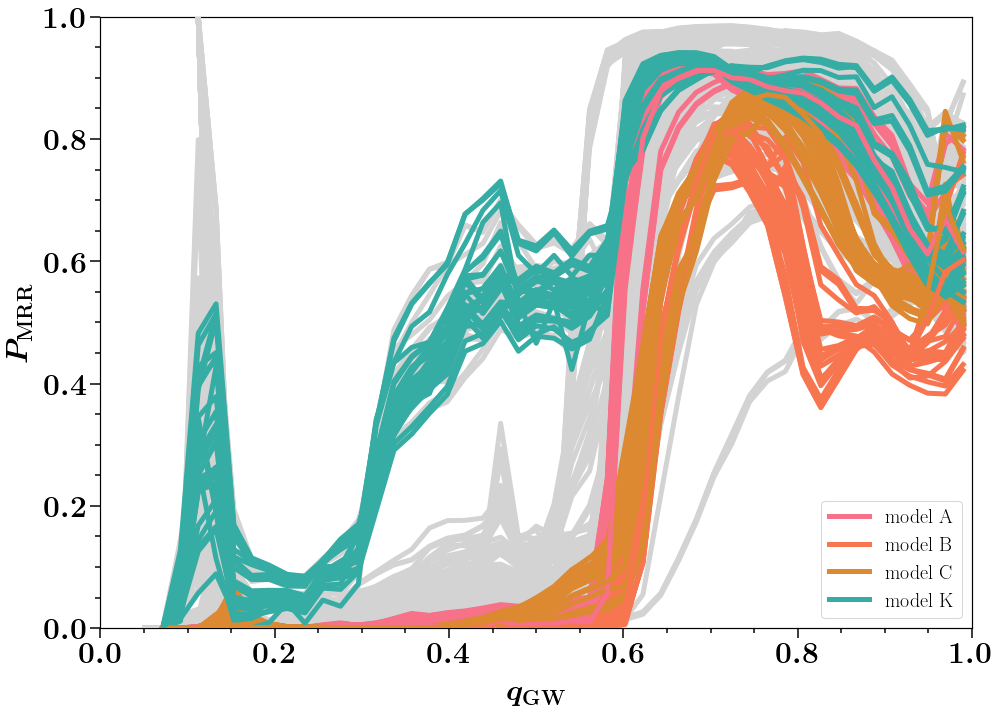

In [126]:
fs=20
import math 



def plotqlines(ax, qlist, qtextvalue):
    """qlist = [5., 3.333333334, 2., 1.]"""
    ## Add constant mass ratio lines 
    x_q = np.linspace(1,50) # Msun, M1 range
    # plot a few fixed mass ratios:
#     xmin = 1 
    xmin, xmax = 1, 50 
    ymin, ymax = 1, 50
    for ind_q, qvalue in enumerate(qlist):
        y_q =  x_q / qvalue


        y_text = 28 # Msun 
        if y_text*qvalue < 50:
            x_text = y_text * qvalue 
        else: 
            x_text = 40.
            y_text = x_text / qvalue

        # I am calculating the angle theta for the text: (see notes on this)
        delta_y = ((y_text - ymin) / (ymax-ymin)) 
        delta_x = ((x_text - xmin*qvalue) / (xmax-xmin))
        ratio = delta_y / delta_x
        theta_angle = math.degrees(math.atan((ratio)))

        ax.plot(x_q, y_q, c='k', lw=2, linestyle =':')
        ax.text(x_text, y_text, s=r'$q_{\rm{f}} =$ %s '%qtextvalue[ind_q], fontsize=24, \
                       horizontalalignment='center', verticalalignment='bottom', rotation=theta_angle)   

        
        







def plotMRR_Prob():
    
    labellist= np.ones(5) #,  r'$\log_{10}(t) $']      
#     fig, axe = plt.subplots(1,1, figsize=(14,10),\
#                            gridspec_kw={"height_ratios":1*[1], "width_ratios":1*[1]})

    
    
    fs_l = 20 # label fontsize  
    
    labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$ ',\
               r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  'separationPreSN [Rsun]' ] # r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']      

    labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'${m}_{\rm{BH}} \, [\rm{M}_{\odot}]$ from ZAMS primary', r'${m}_{\rm{BH}} \, [\rm{M}_{\odot}]$ from ZAMS secondary',\
           r'$q $',  r'$\log(\rm{separationPreSN}) \, [\rm{R}_{\odot}]$' ] #,  r'$\log_{10}(t) $']    
    
    
    

    DCOtype='BBH'
    fig, axe = plt.subplots(1,1, figsize=(14,10),\
                           gridspec_kw={"height_ratios":1*[1], "width_ratios":1*[1]})    
    for BPSmodelName in ['A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',  'P', 'Q', 'R', 'S', 'T']:

        print(' -----   Now at model ', BPSmodelName, ' -------')

#         mssfr = '112' # mssfr that matches LIGO observed rates.
        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

        # read in data 
        fdata = h5.File(path)


        M1BH = fdata['doubleCompactObjects']['M1'][...].squeeze()
        M2BH = fdata['doubleCompactObjects']['M2'][...].squeeze()
        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
        Chirpmass = chirpmass(M1, M2)
        MassRatioBBH = M2/M1

        ### FOR SPIN ###
        seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
        seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
        # get only SN seeds for DCOs 
        maskSNdco = np.in1d(seedsSN,  seedsDCO) 
        whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
        whichSN1 = whichSN[::2] # get whichStar for first SN 


        separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
        separationPreSN2 = separationPreSN[1::2] # in Rsun. 
        MassCOCoreSN = fdata['supernovae']['MassCOCoreSN'][...].squeeze()[maskSNdco][1::2]  

        # the second SN is the most massive BH 
        maskSN2isM1 = ((whichSN1==2) & (M1BH>M2BH) ) | ((whichSN1==1) & (M1BH<M2BH) )  

        mask_temp = ((whichSN1==2) & (M1BH>M2BH) )
        mask_2 = ((whichSN1==1) & (M1BH<M2BH))

        print('nr of weird reversals = %s'%np.sum(mask_temp))
        print('nr of normal reversals = %s'%np.sum(mask_2))
        MRR_mask = (M2BH>M1BH)
        
        for mssfr in MSSFRnameslist:
            
            # get detected weights
            fparam_key = 'weights_detected'
            weightheader = 'w_' + mssfr
            weights_ = fdata[fparam_key][weightheader][...].squeeze()
            w = weights_


            

            print('fraction of MRR = %s'%(np.sum(w[MRR_mask])/np.sum(w)))

            q_grid = np.linspace(0,1, 50)
            q_grid_centers = (q_grid[:-1] + q_grid[1:])/2

            hist_MRR, _ = np.histogram(MassRatioBBH[MRR_mask], q_grid, weights=w[MRR_mask], density=False)
            hist_notMRR, _ = np.histogram(MassRatioBBH[~MRR_mask], q_grid, weights=w[~MRR_mask], density=False)
#             hist_all, _ = np.histogram(MassRatioBBH, q_grid, weights=w, density=False)

#             print(np.sum(hist_all)==(np.sum(hist_MRR)+np.sum(hist_notMRR)), np.sum(hist_all), (np.sum(hist_MRR)+np.sum(hist_notMRR)))
            if BPSmodelName in ['A', 'B', 'C', 'K']:
                if mssfr=='112':
                    axe.plot(q_grid_centers, hist_MRR/(hist_MRR+hist_notMRR), lw=5, c=colorDirDict[BPSmodelName], zorder=10, label=r'model %s'%BPSmodelName)
                else:
                    axe.plot(q_grid_centers, hist_MRR/(hist_MRR+hist_notMRR), lw=5, c=colorDirDict[BPSmodelName], zorder=9)
            else:
                axe.plot(q_grid_centers, hist_MRR/(hist_MRR+hist_notMRR), lw=5, c='lightgray', zorder=5)

        print()
     

            
            
            
    axe.set_xlim(0, 1)
    axe.set_ylim(0, 1)
    axe = layoutAxes(axe, nameX=r'$q_{\rm{GW}}$', nameY=r'$P_{\rm{MRR}}$', setMinor=True, labelpad=10, fontsize=fs_l+10)

    plt.legend(fontsize=20)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)

    f.tight_layout() 
    plt.savefig('./Fraction_p_MRR_vs_q_model_.png', transparent=False, bbox_inches="tight", dpi=300)
    plt.show()    
    
    return 


plotMRR_Prob()


# SPIN BAVERA

In [108]:
fs=20
import math 



def plotqlines(ax, qlist, qtextvalue):
    """qlist = [5., 3.333333334, 2., 1.]"""
    ## Add constant mass ratio lines 
    x_q = np.linspace(1,50) # Msun, M1 range
    # plot a few fixed mass ratios:
#     xmin = 1 
    xmin, xmax = 1, 50 
    ymin, ymax = 1, 50
    for ind_q, qvalue in enumerate(qlist):
        y_q =  x_q / qvalue


        y_text = 28 # Msun 
        if y_text*qvalue < 50:
            x_text = y_text * qvalue 
        else: 
            x_text = 40.
            y_text = x_text / qvalue

        # I am calculating the angle theta for the text: (see notes on this)
        delta_y = ((y_text - ymin) / (ymax-ymin)) 
        delta_x = ((x_text - xmin*qvalue) / (xmax-xmin))
        ratio = delta_y / delta_x
        theta_angle = math.degrees(math.atan((ratio)))

        ax.plot(x_q, y_q, c='k', lw=2, linestyle =':')
        ax.text(x_text, y_text, s=r'$q_{\rm{f}} =$ %s '%qtextvalue[ind_q], fontsize=24, \
                       horizontalalignment='center', verticalalignment='bottom', rotation=theta_angle)   

        
        




def plot2DdistributionScatter_ZOOM(BPSmodelName='A', mssfr='112'):
    
    labellist= np.ones(5) #,  r'$\log_{10}(t) $']      
    fig, ax = plt.subplots(1,2, figsize=(16,16),\
                           gridspec_kw={"height_ratios":1*[1], "width_ratios":1*[1,0.04]})

    DCOtype='BBH'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    
    
    M1BH = fdata['doubleCompactObjects']['M1'][...].squeeze()
    M2BH = fdata['doubleCompactObjects']['M2'][...].squeeze()
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1

    ### FOR SPIN ###
    seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
    seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
    # get only SN seeds for DCOs 
    maskSNdco = np.in1d(seedsSN,  seedsDCO) 
    whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
    whichSN1 = whichSN[::2] # get whichStar for first SN 
    

    separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
    separationPreSN2 = separationPreSN[1::2] # in Rsun. 
    MassCOCoreSN = fdata['supernovae']['MassCOCoreSN'][...].squeeze()[maskSNdco][1::2]  
    
    # the second SN is the most massive BH 
    maskSN2isM1 = ((whichSN1==2) & (M1BH>M2BH) ) | ((whichSN1==1) & (M1BH<M2BH) )  
    
    mask_temp = ((whichSN1==2) & (M1BH>M2BH) )
    mask_2 = ((whichSN1==1) & (M1BH<M2BH))
    
    print('nr of weird reversals = %s'%np.sum(mask_temp))
    print('nr of normal reversals = %s'%np.sum(mask_2))
    
    spinBH = QinBHspinmodel(separationPreSN2, M1, M2, np.ones_like(M1))    
    

        
        
        
    spin = COspin(data_path=path)  # set class 
    spin.setCOMPASData() # reads in the COMPAS DCO parameters 
    spinM1, spinM2  = spin.BaveraSpin()
    
    maxSpinBBH = np.maximum(spinM1,spinM2)
    mask_ = (maxSpinBBH >0)
    print('non-zero spin:', np.sum(mask_), 'out of ', len(mask_), 'BBHs')
    
    COLOR_ =  maxSpinBBH


    ### read in MSSFR weights: ###
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    weights_ = fdata[fparam_key][weightheader][...].squeeze()
        
        
        
        
    labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$ ',\
           r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  'separationPreSN [Rsun]' ] # r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']      
    
    
    
    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
    Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
    massRatio = M2ZAMS / M1ZAMS 

    
    labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'${m}_{\rm{BH}} \, [\rm{M}_{\odot}]$ from ZAMS primary', r'${m}_{\rm{BH}} \, [\rm{M}_{\odot}]$ from ZAMS secondary',\
           r'$q $',  r'$\log(\rm{separationPreSN}) \, [\rm{R}_{\odot}]$' ] #,  r'$\log_{10}(t) $']         
    
#     labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH}} \$ (from ZAMS primary) $\[\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH}} \$ (from ZAMS secondary)  $\[\rm{M}_{\odot}]$',\
#            r'$q $',  r'$\log(\rm{separationPreSN}) \, [\rm{R}_{\odot}]$' ] #,  r'$\log_{10}(t) $']              
    varlist = [Chirpmass, M1BH, M2BH, MassRatio,   np.log10(separationPreSN2)]
    w = weights_
    

    fs_l = 20 # label fontsize
    

    LEGEND = True 
    levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    level_labels = [r"$98\%$", r"$90\%$", r"$75\%$", r"$50\%$", r"$25\%$", r"$10\%$", r"$0\%$"]
    param_x = M1BH
    param_y = M2BH 
    
    
    ### PLOT PLOT ### 
    axe = ax[0]

    plotqlines(ax=axe, qlist=[0.2, 0.5, 1,2,5], qtextvalue=['5', '2', '1', '0.5', '0.2'])
#     axe.set_xlim(min(param_x), max(param_x))
#     axe.set_ylim(min(param_y), max(param_y))      
    axe.set_xlim(1, 50)
    axe.set_ylim(1, 50)  
    NN_ = 1000

#     axe.scatter(param_x[:NN_], param_y[:NN_], s=440*w[:NN_], color='lightgray', zorder=1)
    axe.scatter(param_x, param_y, s=800*w, color='gray', zorder=1)
    
    axe = layoutAxes(axe, nameX=labellist[1], nameY=labellist[2], setMinor=True, labelpad=10, fontsize=fs_l+10)



    cm = plt.cm.get_cmap('viridis_r')
#     sc = ax[0].scatter(param_x[mask_][0:100], param_y[mask_][0:100], s=440*w[mask_][0:100], c=COLOR_[mask_][0:100], zorder=10, vmin=0, vmax=1,cmap=cm)
    sc = ax[0].scatter(param_x[mask_], param_y[mask_], s=800*w[mask_], c=COLOR_[mask_], zorder=10, vmin=0, vmax=1,cmap=cm)
    cbar = f.colorbar(sc, cax=ax[1], orientation='vertical' , format="%.2f")#, boundaries=np.logspace(np.log10(min(center)),max(np.log10(center)),5))#orientation="horizontal", pad=0.2)
    cbar.ax.tick_params(labelsize=20, labeltop=True, labelbottom=False, bottom=False, top=True)
    cbar.set_label(r'$\textbf{spin}$', fontsize=fs+15)
    
    
    ax[0].text(0+0.009, 1-0.009, 'model %s%s \n %s'%(BPSmodelName,mssfr,alphabetPhysicalNameDict[BPSmodelName]) , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left', va='top', transform=ax[0].transAxes, zorder=100)#, weight = 'bold')
    

    
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    
    f.tight_layout() 
    plt.savefig('./Scatter_Final_BaveraSpin_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight", dpi=300)
    plt.show()    
    
    return 




nr of weird reversals = 51
nr of normal reversals = 3383143
8371398 8371398 8371398
non-zero spin: 5114521 out of  8371398 BBHs


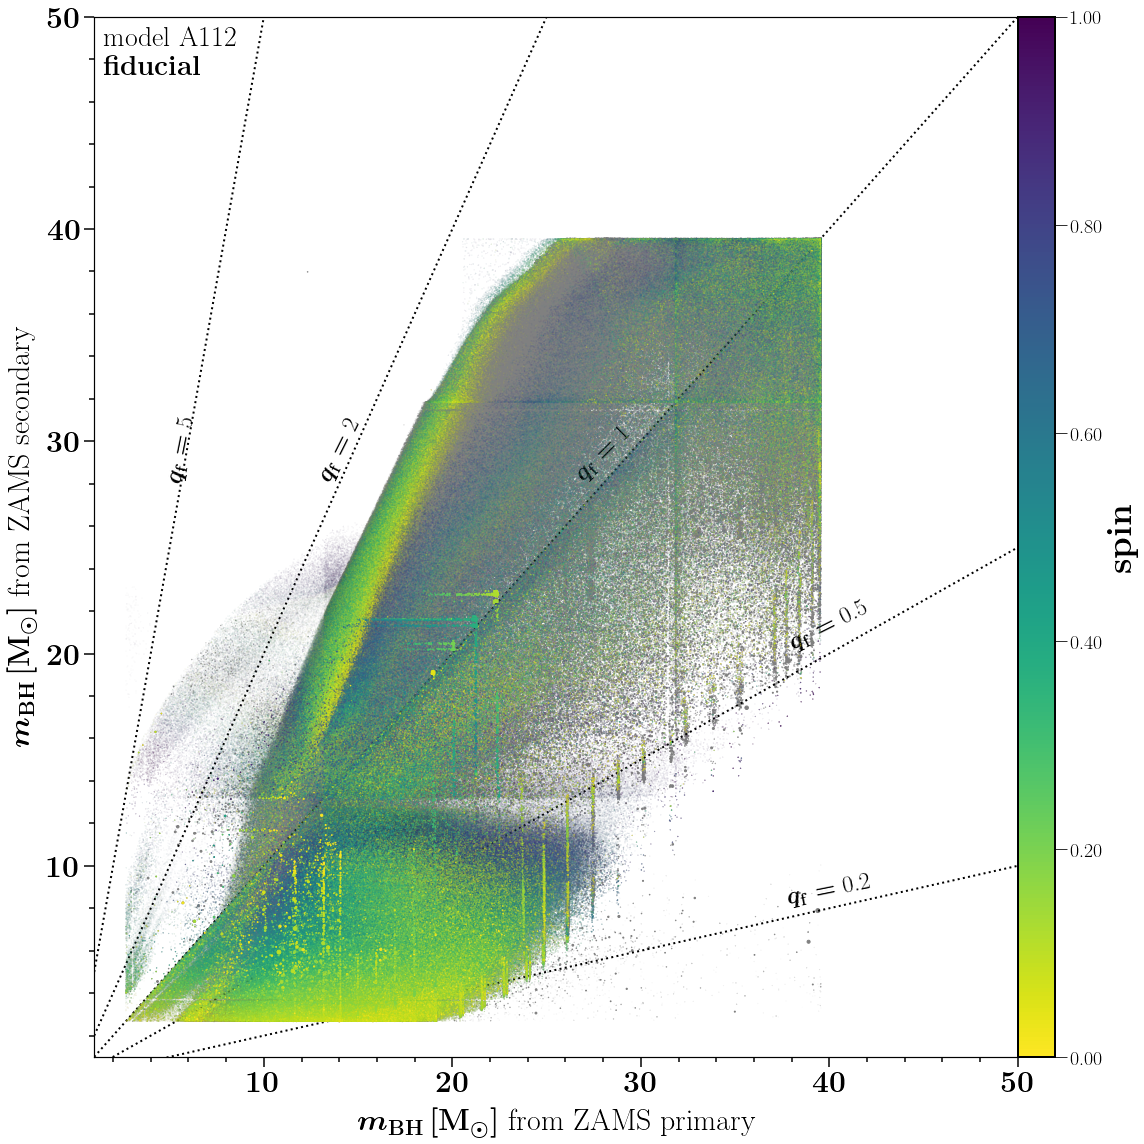

nr of weird reversals = 333
nr of normal reversals = 1250362
8616008 8616008 8616008
non-zero spin: 7335680 out of  8616008 BBHs


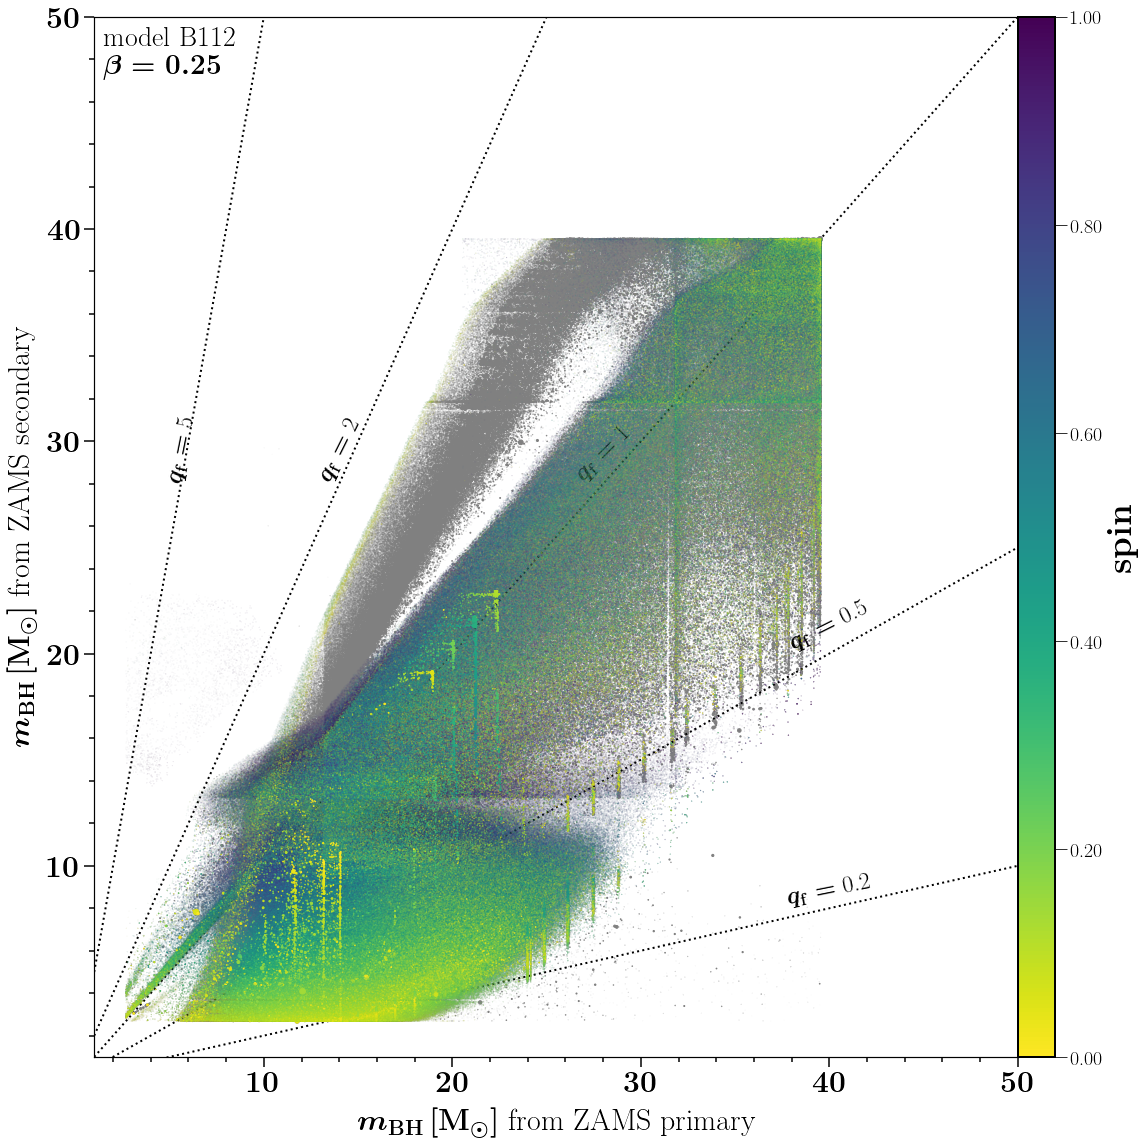

nr of weird reversals = 167
nr of normal reversals = 1980432
6568454 6568454 6568454
non-zero spin: 4796188 out of  6568454 BBHs


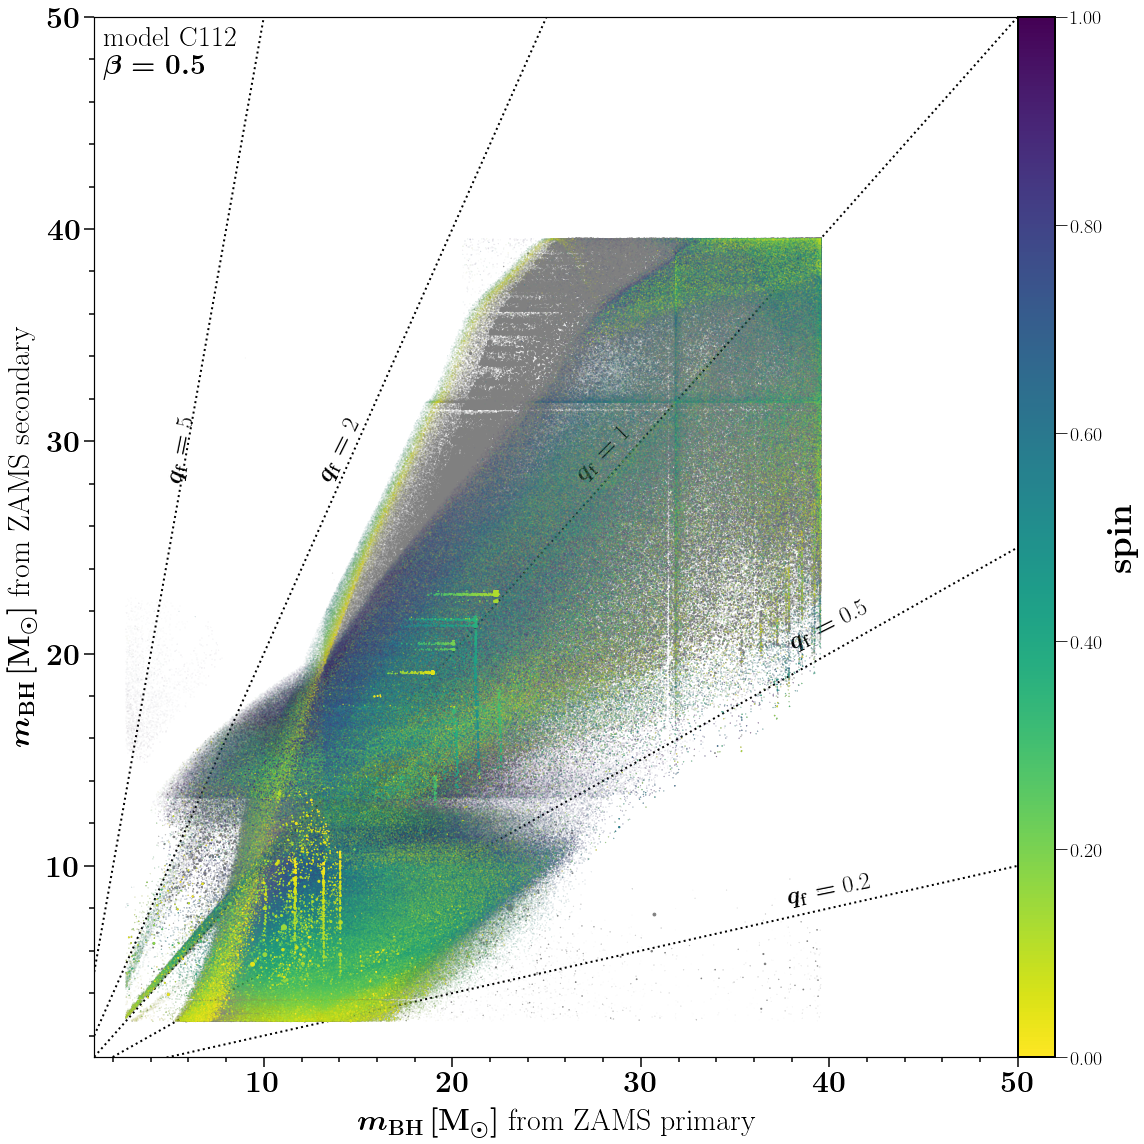

nr of weird reversals = 76
nr of normal reversals = 3198447
6033721 6033721 6033721
non-zero spin: 2989409 out of  6033721 BBHs


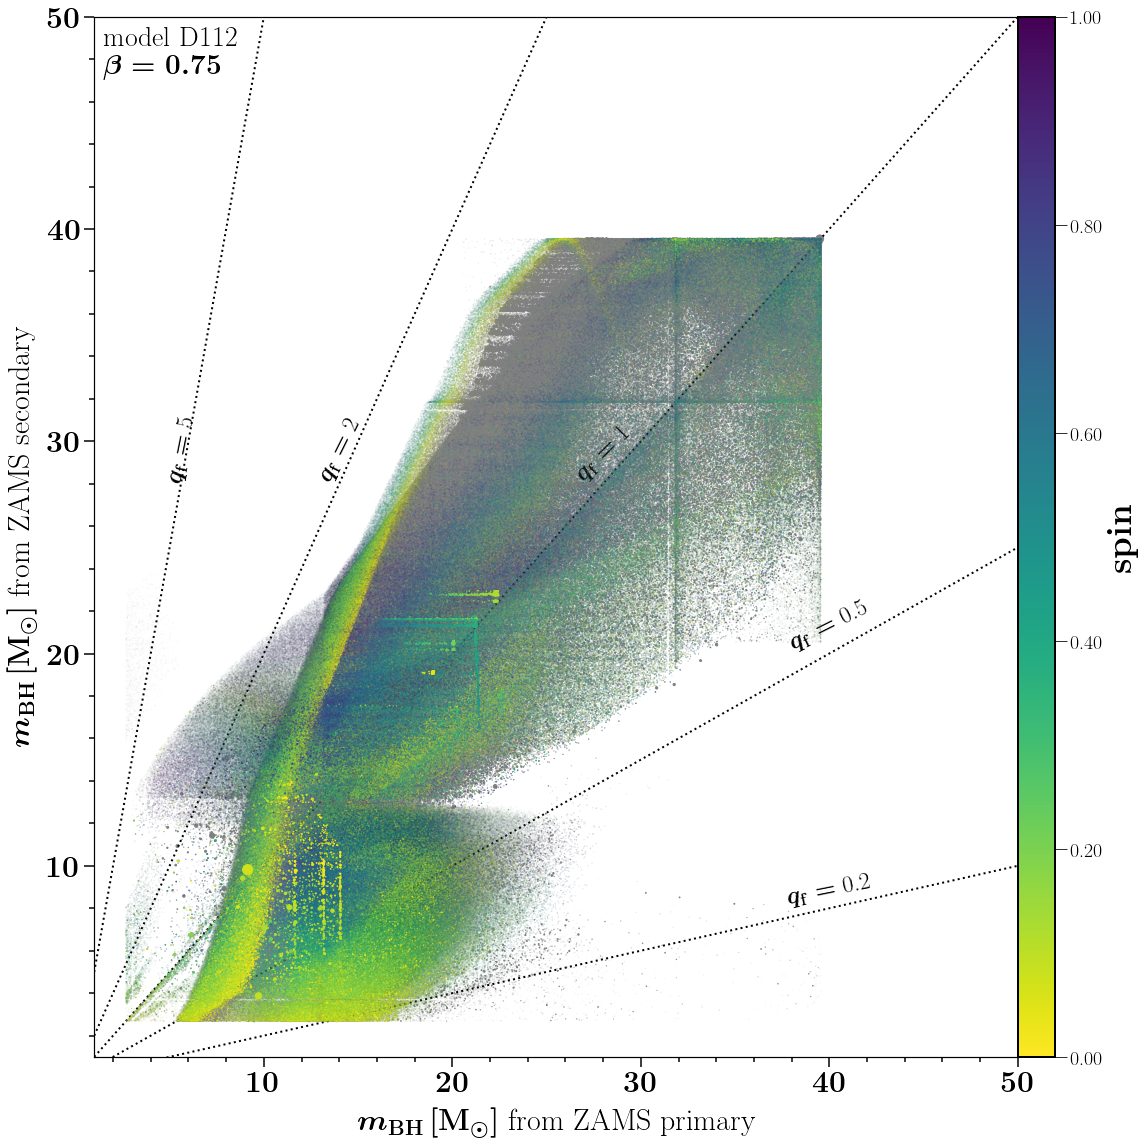

nr of weird reversals = 72
nr of normal reversals = 3738724
9274636 9274636 9274636
non-zero spin: 5641215 out of  9274636 BBHs


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7febe9b41560> (for post_execute):


KeyboardInterrupt: 

In [109]:

for model in ['A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']:


    mssfr = '112' # mssfr that matches LIGO observed rates.



    plot2DdistributionScatter_ZOOM(BPSmodelName=model, mssfr=mssfr)


In [ ]:
fs=20
import math 



def plotqlines(ax, qlist, qtextvalue):
    """qlist = [5., 3.333333334, 2., 1.]"""
    ## Add constant mass ratio lines 
    x_q = np.linspace(1,50) # Msun, M1 range
    # plot a few fixed mass ratios:
#     xmin = 1 
    xmin, xmax = 1, 50 
    ymin, ymax = 1, 50
    for ind_q, qvalue in enumerate(qlist):
        y_q =  x_q / qvalue


        y_text = 28 # Msun 
        if y_text*qvalue < 50:
            x_text = y_text * qvalue 
        else: 
            x_text = 40.
            y_text = x_text / qvalue

        # I am calculating the angle theta for the text: (see notes on this)
        delta_y = ((y_text - ymin) / (ymax-ymin)) 
        delta_x = ((x_text - xmin*qvalue) / (xmax-xmin))
        ratio = delta_y / delta_x
        theta_angle = math.degrees(math.atan((ratio)))

        ax.plot(x_q, y_q, c='k', lw=2, linestyle =':')
        ax.text(x_text, y_text, s=r'$q_{\rm{f}} =$ %s '%qtextvalue[ind_q], fontsize=24, \
                       horizontalalignment='center', verticalalignment='bottom', rotation=theta_angle)   

        
        




def plot2DdistributionScatter_ZOOM(BPSmodelName='A', mssfr='112'):
    
    labellist= np.ones(5) #,  r'$\log_{10}(t) $']      
    fig, ax = plt.subplots(1,2, figsize=(16,16),\
                           gridspec_kw={"height_ratios":1*[1], "width_ratios":1*[1,0.04]})

    DCOtype='BBH'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    
    
    M1BH = fdata['doubleCompactObjects']['M1'][...].squeeze()
    M2BH = fdata['doubleCompactObjects']['M2'][...].squeeze()
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1

    ### FOR SPIN ###
    seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
    seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
    # get only SN seeds for DCOs 
    maskSNdco = np.in1d(seedsSN,  seedsDCO) 
    whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
    whichSN1 = whichSN[::2] # get whichStar for first SN 
    

    separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
    separationPreSN2 = separationPreSN[1::2] # in Rsun. 
    MassCOCoreSN = fdata['supernovae']['MassCOCoreSN'][...].squeeze()[maskSNdco][1::2]  
    
    # the second SN is the most massive BH 
    maskSN2isM1 = ((whichSN1==2) & (M1BH>M2BH) ) | ((whichSN1==1) & (M1BH<M2BH) )  
    
    mask_temp = ((whichSN1==2) & (M1BH>M2BH) )
    mask_2 = ((whichSN1==1) & (M1BH<M2BH))
    
    print('nr of weird reversals = %s'%np.sum(mask_temp))
    print('nr of normal reversals = %s'%np.sum(mask_2))
    
    spinBH = QinBHspinmodel(separationPreSN2, M1, M2, np.ones_like(M1))    
    

        
        
        
    spin = COspin(data_path=path)  # set class 
    spin.setCOMPASData() # reads in the COMPAS DCO parameters 
    spinM1, spinM2  = spin.BaveraSpin()
    
    maxSpinBBH = np.maximum(spinM1,spinM2)
    mask_ = (maxSpinBBH >0)
    print('non-zero spin:', np.sum(mask_), 'out of ', len(mask_), 'BBHs')
    
    COLOR_ =  maxSpinBBH


    ### read in MSSFR weights: ###
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    weights_ = fdata[fparam_key][weightheader][...].squeeze()
        
        
        
        
    labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$ ',\
           r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  'separationPreSN [Rsun]' ] # r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']      
    
    
    
    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
    Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
    massRatio = M2ZAMS / M1ZAMS 

    
    labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'${m}_{\rm{BH}} \, [\rm{M}_{\odot}]$ from ZAMS primary', r'${m}_{\rm{BH}} \, [\rm{M}_{\odot}]$ from ZAMS secondary',\
           r'$q $',  r'$\log(\rm{separationPreSN}) \, [\rm{R}_{\odot}]$' ] #,  r'$\log_{10}(t) $']         
    
#     labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH}} \$ (from ZAMS primary) $\[\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH}} \$ (from ZAMS secondary)  $\[\rm{M}_{\odot}]$',\
#            r'$q $',  r'$\log(\rm{separationPreSN}) \, [\rm{R}_{\odot}]$' ] #,  r'$\log_{10}(t) $']              
    varlist = [Chirpmass, M1BH, M2BH, MassRatio,   np.log10(separationPreSN2)]
    w = weights_
    

    fs_l = 20 # label fontsize
    

    LEGEND = True 
    levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    level_labels = [r"$98\%$", r"$90\%$", r"$75\%$", r"$50\%$", r"$25\%$", r"$10\%$", r"$0\%$"]
    param_x = M1BH
    param_y = M2BH 
    
    
    ### PLOT PLOT ### 
    axe = ax[0]

    plotqlines(ax=axe, qlist=[0.2, 0.5, 1,2,5], qtextvalue=['5', '2', '1', '0.5', '0.2'])
#     axe.set_xlim(min(param_x), max(param_x))
#     axe.set_ylim(min(param_y), max(param_y))      
    axe.set_xlim(1, 50)
    axe.set_ylim(1, 50)  
    NN_ = 1000

#     axe.scatter(param_x[:NN_], param_y[:NN_], s=440*w[:NN_], color='lightgray', zorder=1)
    axe.scatter(param_x, param_y, s=800*w, color='gray', zorder=1)
    
    axe = layoutAxes(axe, nameX=labellist[1], nameY=labellist[2], setMinor=True, labelpad=10, fontsize=fs_l+10)



    cm = plt.cm.get_cmap('viridis_r')
#     sc = ax[0].scatter(param_x[mask_][0:100], param_y[mask_][0:100], s=440*w[mask_][0:100], c=COLOR_[mask_][0:100], zorder=10, vmin=0, vmax=1,cmap=cm)
    sc = ax[0].scatter(param_x[mask_], param_y[mask_], s=800*w[mask_], c=COLOR_[mask_], zorder=10, vmin=0, vmax=1,cmap=cm)
    cbar = f.colorbar(sc, cax=ax[1], orientation='vertical' , format="%.2f")#, boundaries=np.logspace(np.log10(min(center)),max(np.log10(center)),5))#orientation="horizontal", pad=0.2)
    cbar.ax.tick_params(labelsize=20, labeltop=True, labelbottom=False, bottom=False, top=True)
    cbar.set_label(r'$\textbf{spin}$', fontsize=fs+15)
    
    
    ax[0].text(0+0.009, 1-0.009, 'model %s%s \n %s'%(BPSmodelName,mssfr,alphabetPhysicalNameDict[BPSmodelName]) , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left', va='top', transform=ax[0].transAxes, zorder=100)#, weight = 'bold')
    

    
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    
    f.tight_layout() 
    plt.savefig('./Scatter_Final_BaveraSpin_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight", dpi=300)
    plt.show()    
    
    return 




In [ ]:


labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                 
f, ax= plt.subplots(ncols=1,nrows=1,figsize=(16,16))
mssfr = '112' # mssfr that matches LIGO observed rates.
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter_ZOOM(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='BaveraSpin0_5')
plt.savefig('./Scatter_Final_BaveraSpin0_5_ZOOM_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()




In [ ]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A', maskDCOs=None):
    
    
    
    
    
    
    DCOtype='BBH'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    
    
    M1BH = fdata['doubleCompactObjects']['M1'][...].squeeze()
    M2BH = fdata['doubleCompactObjects']['M2'][...].squeeze()
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1

    ### FOR SPIN ###
    
    
    seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
    seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
    # get only SN seeds for DCOs 
    maskSNdco = np.in1d(seedsSN,  seedsDCO) 
    whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
    whichSN1 = whichSN[::2] # get whichStar for first SN 

    separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
    separationPreSN2 = separationPreSN[1::2] # in Rsun. 


    maskNSBH = ((whichSN1==2) & (M1BH>M2BH) ) | ((whichSN1==1) & (M1BH<M2BH) )  
    
    mask_temp = ((whichSN1==2) & (M1BH>M2BH) )
    mask_2 = ((whichSN1==1) & (M1BH<M2BH))
    
    print('nr of weird reversals = %s'%np.sum(mask_temp))
    print('nr of normal reversals = %s'%np.sum(mask_2))
    
    # BH1 is the most massive BH in the binary
    if maskDCOs==None:
        mask_ = np.ones_like(M1BH)
        COLOR='lightgray'
    elif maskDCOs=='BH1formedFirst':
        mask_ = (maskNSBH==0)
        COLOR_ = 'orange'
    elif maskDCOs=='BH1formedSecond':
        mask_ = (maskNSBH==1)
        COLOR_ = 'lightskyblue' 
       
    
    spinBH = QinBHspinmodel(separationPreSN2, M1, M2, maskNSBH)
    
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    weights_ = fdata[fparam_key][weightheader][...].squeeze()
        
        
        

    
    
    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
    Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
    massRatio = M2ZAMS / M1ZAMS 
    
#     varlist = [M1ZAMS[mask_], M2ZAMS[mask_], separationInitial[mask_], massRatio[mask_],]
#     w = weights_[mask_]
    
    


    
    
#     labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH from ZAMS M1}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH from ZAMS M2}} \ [\rm{M}_{\odot}]$',\
#            r'$q $',  r'$\log(\rm{separationPreSN}) \, [\rm{R}_{\odot}]$' ] #,  r'$\log_{10}(t) $'] 
    
    
        
    labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
           r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  'separationPreSN [Rsun]' ] # r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']      
    
    varlist = varlist = [M1ZAMS, M2ZAMS, separationInitial, massRatio,    np.log10(separationPreSN2)]
    w = weights_
    
    maskSpin = (spinBH >= 0.1)
#     maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
#     maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
    fs_l = 20 # label fontsize
    

    LEGEND = True 
    levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    level_labels = [r"$98\%$", r"$90\%$", r"$75\%$", r"$50\%$", r"$25\%$", r"$10\%$", r"$0\%$"]
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 80)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
                
#                 print(len(varlist[jj][maskSpin]), len(varlist[ii][maskSpin]), w[maskSpin])
                hist, bin_edges = np.histogram(varlist[jj][mask_], bins=nrbins, weights=w[mask_])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=COLOR_, lw=2, zorder=3)   
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=COLOR_, zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
                
                
                # LEGEND inside panel 
#                 if param_x==r'$q $':
#                     xx = [-100, -50]
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
# #                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = r'$\chi > 0.1$')
# #                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
# #                     ax[ii,jj].set_legend(fontsize=24, loc='top right')
#                     ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.7, 0.9), frameon=False)
                    

                if jj==(len(var)-1):
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 
                    
                if ii==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY='PDF', setMinor=False, labelpad=10, fontsize=fs_l)

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
#                 if (ii ==4) | (jj==0):
#                     ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
#                     ax[ii,jj].scatter(varlist[jj][maskSpin], varlist[ii][maskSpin], s=4400*w[maskSpin], color='orange', zorder=10)
# #                     ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=4400*w[maskGW200115], color='lightskyblue', zorder=10)
                
                NN_ = 100000
        
#                 print(len(varlist[jj][maskSpin]), len(varlist[ii][maskSpin]), w[maskSpin])
#                 ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
#                 ax[ii,jj].scatter(varlist[jj][maskSpin], varlist[ii][maskSpin], s=140*w[maskSpin], color='orange', zorder=10)
#                 sns.kdeplot(x=varlist[jj][0:NN_], y=varlist[ii][0:NN_], ax=ax[ii, jj],  color=COLOR, linewidth=3, shade=True, levels=levels, bw_method=0.3, zorder=11)
#                      ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)

                if (ii==(len(var)-1)):
                    print(ii)
#                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                if jj==0:
#                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 

    cmap = cmap_from_colour(COLOR_)
    scatter = axe[0,0].scatter(np.ones_like(levels) * 1e-5, np.ones_like(levels) * 1e-21, c=levels, cmap=cmap)
    inset_ax = axe[1,2].inset_axes([0.25, 0.5, 1.5, 0.18])
    cbar = f.colorbar(scatter, ax=axe[0,1], cax=inset_ax, boundaries=levels, orientation="horizontal")
    cbar.set_ticklabels(level_labels)
    cbar.ax.tick_params(labelsize=26)                    

    axe[1,2].annotate('BBH', xy=(1.0, 0.72), xycoords="axes fraction",
                     fontsize=fs+10, color="black", ha="center", va="bottom")  
                    
## ALL 
# labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                      
# f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

# mssfr = '112' # mssfr that matches LIGO observed rates.

# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)#2)
# model='P'

# plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
# plt.savefig('./Scatter_ZAMS_BH1_from_ALL_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
# plt.show()




## BH1s from Primart 

labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                      
f, ax= plt.subplots(ncols=1,nrows=1,figsize=(16,16))

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='BH1formedFirst')
plt.savefig('./Scatter_ZAMS_BH1_formed_first_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()



############
## BH1s from Secondary

labellist= np.ones(5) #,  r'$\log_{10}(t) $']                                      
f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model, maskDCOs='BH1formedSecond')
plt.savefig('./Scatter_ZAMS_BH1_formed_second_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight", dpi=300)
plt.show()

In [ ]:
# fs=20
# def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    

    
#     DCOtype='BBH'
#     # path for files 
#     path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
#     path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

#     # read in data 
#     fdata = h5.File(path)
#     print(fdata.keys())
    
#     # M1 will be the most massive, M2 the least massive compact object. 
#     M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
#     Chirpmass = chirpmass(M1, M2)
#     MassRatio = M2/M1
        
#     ### read in MSSFR weights: ###
#     mssfr = '112' # mssfr that matches LIGO observed rates.
#     # get detected weights
#     fparam_key = 'weights_detected'
#     weightheader = 'w_' + mssfr
#     w = fdata[fparam_key][weightheader][...].squeeze()
        
#     labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{NS}} \ [\rm{M}_{\odot}]$',\
#            r'$q $'] #,  r'$\log_{10}(t) $']              
#     varlist = [Chirpmass, M1, M2, MassRatio]
    
    
#     levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
#     level_labels = [r"$98\%$", r"$90\%$", r"$75\%$", r"$50\%$", r"$25\%$", r"$10\%$", r"$0\%$"]

    
    
#     maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) & (((M2+M1)>=(10.9-1.2)) & ((M2+M1)<=(10.9+1.1)))
#     maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) & (((M2+M1)>=(7.1 -1.4)) & ((M2+M1)<=(7.1 +1.5)))
    
#     fs_l = 20 # label fontsize
    
#     cGW1 = 'lightskyblue' 
#     cGW0 = 'orange'
#     LEGEND = True 
#     for jj, param_x in enumerate(var):
#         jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

#         for ii, param_y in enumerate(var):

#             ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
#             if ii==jj:
#                 nrbins=np.linspace(jj_minn, jj_maxx, 75)
#                 hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color='lightgray', lw=3, zorder=2)
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW0, lw=3, zorder=3)   
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW1, lw=3, zorder=3)  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
#                 ylabel='PDF'
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(0,1)
#                 if param_x== r'$m_{\rm{BH}} \ [M_{\odot}]$':
#                     axe[ii,jj].set_xlim(jj_minn, 27)
#                 if param_x==  r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
#                     axe[ii,jj].set_xlim(jj_minn, 6.2)
                    
                    
                    
#                 if param_x==r'$q $':
#                     xx = [-100, -50]
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
#                     ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.65, 0.9), frameon=False)
                    

#                 if jj==(len(var)-1):
#                     ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

#                 if ii!=0:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 
                    
#                 if ii==0:
#                     ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=r'$\textbf{PDF}$', setMinor=False, labelpad=10, fontsize=fs_l)

#             elif jj>ii:
#                 ax[ii,jj].set_axis_off()                    

#             else:
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(ii_minn, ii_maxx)
#                 # cut axes for chirp and MBH mass 
#                 if param_x==  r'$m_{\rm{BH}} \ [M_{\odot}]$':
#                     axe[ii,jj].set_xlim(jj_minn, 27)
#                 if param_x== r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
#                     axe[ii,jj].set_xlim(jj_minn, 6.2)
#                 if param_y==  r'$m_{\rm{BH}} \ [M_{\odot}]$':
#                     axe[ii,jj].set_ylim(ii_minn, 27)
#                 if param_y==r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
#                     axe[ii,jj].set_ylim(ii_minn, 6.2)                
                
#                 x = varlist[jj] #np.linspace(0,1,100)
#                 y = np.ones_like(varlist[jj])
#                 print(np.shape(varlist[jj]))
#                 print(np.shape(x))
#                 N = 1000#  len(varlist[jj])


#                 sns.kdeplot(x=varlist[jj][0:N], y=varlist[ii][0:N], weights=w[0:N], ax=ax[ii, jj],  color='gray', shade=True, levels=levels, bw_method=0.3, zorder=9)
#                 ax[ii,jj].scatter(varlist[jj][0:N], varlist[ii][0:N], s=140*w[0:N], color='gray', zorder=4)
                
#                 ax[ii,jj].scatter(varlist[jj][maskM2firstSN], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
# #                 ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)
                
#                 if (ii==(len(var)-1)):
#                     print(ii)
#                     ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
#                 if jj==0:
#                     ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
#                 else:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 


#     cmap = cmap_from_colour('gray')
#     scatter = ax[0,0].scatter(np.ones_like(levels) * 1e-5, np.ones_like(levels) * 1e-21, c=levels, cmap=cmap)
#     inset_ax = ax[1,2].inset_axes([0.25, 0.5, 1.5, 0.18])
#     cbar = f.colorbar(scatter, ax=ax[0,1], cax=inset_ax, boundaries=levels, orientation="horizontal")
#     cbar.set_ticklabels(level_labels)
#     cbar.ax.tick_params(labelsize=26)                    

#     ax[1,2].annotate('All BHNS', xy=(1.0, 0.72), xycoords="axes fraction",
#                      fontsize=fs+10, color="black", ha="center", va="bottom")                     
                    
                    
                    
                    
                    
# labellist=[r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$m_{\rm{BH}} \ [M_{\odot}]$', r'$m_{\rm{NS}} \ [M_{\odot}]$',\
#            r'$q $'] #,  r'$\log_{10}(t) $']     

# f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

# mssfr = '112' # mssfr that matches LIGO observed rates.

# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)#2)
# model='P'
# plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
# plt.savefig('./Scatter_BHBH' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
# plt.show()






In [ ]:
# fs=20
# def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    

    
#     DCOtype='BHNS'
#     # path for files 
#     path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
#     path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

#     # read in data 
#     fdata = h5.File(path)
# #     print(fdata['doubleCompactObjects'].keys())
    
#     # M1 will be the most massive, M2 the least massive compact object. 
#     M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
#     Chirpmass = chirpmass(M1, M2)
#     MassRatio = M2/M1
    
    
#     seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
#     seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
#     # get only SN seeds for DCOs 
#     maskSNdco = np.in1d(seedsSN,  seedsDCO) 
#     whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
#     whichSN1 = whichSN[::2] # get whichStar for first SN 


#     separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
#     separationPreSN2 = separationPreSN[1::2] # in Rsun. 


#     maskNSBH = ((whichSN1==2) & (M1>M2) ) | ((whichSN1==1) & (M1<M2) )  
#     print('sum NS-BH mask = ', np.sum(maskNSBH))

#     print('sum mask = ', np.sum(maskSNdco))

#     spinBH = QinBHspinmodel(separationPreSN2, M1, M2, maskNSBH)
#     print(spinBH)
    
        
#     ### read in MSSFR weights: ###
#     mssfr = '112' # mssfr that matches LIGO observed rates.
#     # get detected weights
#     fparam_key = 'weights_detected'
#     weightheader = 'w_' + mssfr
#     w = fdata[fparam_key][weightheader][...].squeeze()
        
#     labellist=[ r'$\rm{M}_{\rm{chirp}}$', r'$\rm{M}_{\rm{BH}} \ [\rm{M}_{\odot}]$', r'$\rm{M}_{\rm{NS}} \ [\rm{M}_{\odot}]$',\
#            r'$q $', r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']              
#     varlist = [Chirpmass, M1, M2, MassRatio, spinBH]
    
#     print(len(w))
#     fraction = np.sum(w[maskNSBH]) / np.sum(w)
#     print('fraction=', fraction)
    
    
#     maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
#     maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
#     fs_l = 20 # label fontsize
    
#     cGW1 = 'lightskyblue' 
#     cGW0 = 'orange'
#     LEGEND = True 
#     for jj, param_x in enumerate(var):
#         jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

#         for ii, param_y in enumerate(var):

#             ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
#             if ii==jj:
#                 nrbins=np.linspace(jj_minn, jj_maxx, 100)
#                 hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW0, lw=2, zorder=3)   
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
#                 ylabel='PDF'
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(0,1)
                
#                 if param_x==r'$q $':
#                     xx = [-100, -50]
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
# #                     ax[ii,jj].set_legend(fontsize=24, loc='top right')
#                     ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.65, 0.9), frameon=False)
                    

#                 if jj==(len(var)-1):
#                     ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

#                 if ii!=0:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 
                    
#                 if ii==0:
#                     ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=r'$\textbf{PDF}$', setMinor=False, labelpad=10, fontsize=fs_l)

#             elif jj>ii:
#                 ax[ii,jj].set_axis_off()                    

#             else:
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(ii_minn, ii_maxx)
#                 N=1000 # temp 
#                 ax[ii,jj].scatter(varlist[jj][0:], varlist[ii][0:], s=140*w[0:], color='lightgray', zorder=1)
#                 ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
#                 ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)
                
#                 if (ii==(len(var)-1)):
#                     print(ii)
# #                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
#                     ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
#                 if jj==0:
# #                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
#                     ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
#                 else:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 

# labellist=[ r'$M_{\rm{chirp}}$', r'$M_{\rm{BH}} \ [M_{\odot}]$', r'$M_{\rm{NS}} \ [M_{\odot}]$',\
#            r'$q $', r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']     

# f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

# mssfr = '112' # mssfr that matches LIGO observed rates.

# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)#2)
# model='P'
# plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
# plt.savefig('./Scatter_Final_spin_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
# plt.show()






In [ ]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    
    DCOtype='BBH'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1

    ### FOR SPIN ###
    
    
    seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
    seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
    # get only SN seeds for DCOs 
    maskSNdco = np.in1d(seedsSN,  seedsDCO) 
    whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
    whichSN1 = whichSN[::2] # get whichStar for first SN 

    separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
    separationPreSN2 = separationPreSN[1::2] # in Rsun. 


    maskNSBH = ((whichSN1==2) & (M1>M2) ) | ((whichSN1==1) & (M1<M2) )  

    spinBH = QinBHspinmodel(separationPreSN2, M1, M2, maskNSBH)
    
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()
        
    labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
           r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']      
    
    
    
    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
    Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
    massRatio = M2ZAMS / M1ZAMS 
    
    varlist = [M1ZAMS, M2ZAMS, separationInitial, massRatio, spinBH]
    
    
    maskSpin = (spinBH >= 0.1)
#     maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
#     maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
    fs_l = 20 # label fontsize
    
    cGW1 = 'lightskyblue' 
    cGW0 = 'orange'
    LEGEND = True 
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 80)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskSpin], bins=nrbins, weights=w[maskSpin])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=2, zorder=3)   
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
                
                if param_x==r'$q $':
                    xx = [-100, -50]
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = r'$\chi > 0.1$')
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
#                     ax[ii,jj].set_legend(fontsize=24, loc='top right')
                    ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.7, 0.9), frameon=False)
                    

                if jj==(len(var)-1):
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 
                    
                if ii==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY='PDF', setMinor=False, labelpad=10, fontsize=fs_l)

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
                if (ii ==4) | (jj==0):
                    ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
                    ax[ii,jj].scatter(varlist[jj][maskSpin], varlist[ii][maskSpin], s=4400*w[maskSpin], color='orange', zorder=10)
#                     ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=4400*w[maskGW200115], color='lightskyblue', zorder=10)
                
                else:
                    ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
                    ax[ii,jj].scatter(varlist[jj][maskSpin], varlist[ii][maskSpin], s=140*w[maskSpin], color='orange', zorder=10)
#                     ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)

                if (ii==(len(var)-1)):
                    print(ii)
#                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                if jj==0:
#                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 


labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
       r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']                      
                    
                    
f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
plt.savefig('./Scatter_ZAMS_Spin2_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()

In [ ]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    
    DCOtype='BHNS'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1

    ### FOR SPIN ###
    
    
    seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
    seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
    # get only SN seeds for DCOs 
    maskSNdco = np.in1d(seedsSN,  seedsDCO) 
    whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
    whichSN1 = whichSN[::2] # get whichStar for first SN 

    separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
    separationPreSN2 = separationPreSN[1::2] # in Rsun. 


    maskNSBH = ((whichSN1==2) & (M1>M2) ) | ((whichSN1==1) & (M1<M2) )  

    spinBH = QinBHspinmodel(separationPreSN2, M1, M2, maskNSBH)
    
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()
        
    labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
           r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']      
    
    
    
    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
    Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
    massRatio = M2ZAMS / M1ZAMS 
    
    varlist = [M1ZAMS, M2ZAMS, separationInitial, massRatio, spinBH]
    
    
    
    maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
    maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
    fs_l = 20 # label fontsize
    
    cGW1 = 'lightskyblue' 
    cGW0 = 'orange'
    LEGEND = True 
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 80)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=2, zorder=3)   
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
                
                if param_x==r'$q $':
                    xx = [-100, -50]
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
#                     ax[ii,jj].set_legend(fontsize=24, loc='top right')
                    ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.7, 0.9), frameon=False)
                    

                if jj==(len(var)-1):
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 
                    
                if ii==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY='PDF', setMinor=False, labelpad=10, fontsize=fs_l)

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
                if (ii ==4) | (jj==0):
                    ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
                    ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=4400*w[maskGW200105], color='orange', zorder=10)
                    ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=4400*w[maskGW200115], color='lightskyblue', zorder=10)
                
                else:
                    ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
                    ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
                    ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)

                if (ii==(len(var)-1)):
                    print(ii)
#                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                if jj==0:
#                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 


labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
       r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']                      
                    
                    
f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
plt.savefig('./Scatter_Final_Spin2_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()

In [ ]:
def function_f_Bavera21(m_WR, c1, c2, c3):
    """
    m_WR with units using astropy
    
    
    """
    
    
    top = -c1
    bottom = c2 + np.exp(-c3*m_WR.to(u.Msun).value)
    
    f = top/bottom

    
    return f 



def calculate_alpha_beta_Bavera21(m_WR, c1_alpha, c2_alpha, c3_alpha,  c1_beta,  c2_beta,  c3_beta):
    
    
    alpha = function_f_Bavera21(m_WR, c1_alpha, c2_alpha, c3_alpha)
    beta  = function_f_Bavera21(m_WR, c1_beta,  c2_beta,  c3_beta)
    
    return alpha, beta


def calculate_BH_spin_Bavera21(m_WR, period, maskBH2):
    """
    based on Eq 1 and 2 from https://arxiv.org/pdf/2105.09077.pdf
    
    
    """
 
    # numerical coefficients form text below Eq 2
    # we use the values at helium depletion, since we later on use the C/O core mass. 
    c1_alpha, c2_alpha, c3_alpha =  0.059305, 0.035552, 0.270245
    c1_beta,  c2_beta, c3_beta   =  0.026960, 0.011001, 0.420739
    
    alpha, beta = calculate_alpha_beta_Bavera21(m_WR, c1_alpha, c2_alpha, c3_alpha,  c1_beta,  c2_beta,  c3_beta)
    print(alpha, beta)
    
    
    # make array with zeroes with length similar to input
    print(m_WR)
    a_BH2 = np.zeros(len(m_WR.value))

    
    print(period.value)
    maskBH2_and_P_below_1Day = (maskBH2==1) & (np.asarray(period.value) <= 1)
    print(maskBH2_and_P_below_1Day)
    
    
    
    # if they formed second, update the BH spin with the Bavera spin 
    print('inside function', len(period), len(maskBH2_and_P_below_1Day), len(period[maskBH2_and_P_below_1Day].to(u.d).value))
    
#     print((len(alpha) * (np.log10(period[maskBH2_and_P_below_1Day].to(u.d).value))**2))
    first_term = (alpha[maskBH2_and_P_below_1Day] * (np.log10(period[maskBH2_and_P_below_1Day].to(u.d).value))**2) 
#     print('first = ', first_term)
#     print(period[maskBH2_and_P_below_1Day].to(u.d).value)
    second_term =  ( beta[maskBH2_and_P_below_1Day] * np.log10(period[maskBH2_and_P_below_1Day].to(u.d).value))  
    
#     print(len(first_term))
#     print(len(second_term))
#     print(len( first_term  + second_term))
#     print(a_BH2[maskBH2_and_P_below_1Day])
    a_BH2[maskBH2_and_P_below_1Day]  =  first_term  + second_term  
    
    return a_BH2




    
    
    
    
    

In [ ]:
def print_spinning_BHNS(BPSmodelName='P', mssfr = '112'):
    """
    
    mssfr = '112' # mssfr that matches LIGO observed rates.
    """
    
    
    DCOtype='BBH'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)


    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1
    ### read in MSSFR weights: ###
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()

    labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{NS}} \ [\rm{M}_{\odot}]$',\
           r'$q $'] #,  r'$\log_{10}(t) $']              
    varlist = [Chirpmass, M1, M2, MassRatio]


    
    # data needed to calculate spin 
    seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
    seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
#     # get only SN seeds for DCOs 
    maskSNdco = np.in1d(seedsSN,  seedsDCO) 
#     whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
#     whichSN1 = whichSN[::2] # get whichStar for first SN 

#     whichSN = fdata['supernovae']['whichStar'][...].squeeze() 


#     seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
    seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
    u, indices = np.unique(seedsSN, return_index=True) # get the first SN 
    whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco][::2] # get whichStar for first SN 

#     print(len(seedsSN), len(set(seedsSN)))
#     print(whichSN)
#     print(set(whichSN))
#     print(len(whichSN), len(M1), len(M2))
    maskNSBH = ((whichSN==2) & (M1>M2) ) | ((whichSN==1) & (M1<M2) ) 
    maskGW200115 = np.asarray(np.ones_like(M1))
    maskGW200115 = np.asarray(np.ones_like(M1))
    
    separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
    separationPreSN2 = separationPreSN[1::2] # in Rsun. 
  


    # get the MassCOCoreSN for the second SN
    MassCOCoreSN = fdata['supernovae']['MassCOCoreSN'][...].squeeze()[1::2] 
    
    

    
    print('----- OLD OLD AND WRONG my fault analytical fit Debatri ----- ')

    
    # M1 is compact object mass, so the same 
    spinBH = QinBHspinmodel(separationPreSN2, M1, M2, maskNSBH)  
    mask_spin = (spinBH >=0.05)
    mask_spinBig = (spinBH>=0.2)
    
    
    print('--- small >0.05 BH spin ---')
    print('fraction of all BBH = ', np.sum(w[mask_spin])/(np.sum(w)) )
    print()
    

    print('--- moderate >0.2 BH spin---')
    print('fraction of all BHNS = ', np.sum(w[mask_spinBig])/(np.sum(w)) )
    
    
    
    print('----- old analytical fit Debatri ----- ')
    
    # M1 is compact object mass, so the same 
    spinBH = QinBHspinmodel(separationPreSN2, M1, MassCOCoreSN, maskNSBH)  
    mask_spin = (spinBH >=0.05)
    mask_spinBig = (spinBH>=0.2)
    
    
    print('--- small >0.05 BH spin ---')
    print('fraction of all BBH = ', np.sum(w[mask_spin])/(np.sum(w)) )
    print()
    

    print('--- moderate >0.2 BH spin---')
    print('fraction of all BHNS = ', np.sum(w[mask_spinBig])/(np.sum(w)) )

    
    print()
    
    print('------ Bavera 2021 ------- ')
    print()
    
    # M1 is compact object, M2 is WR mass 
    M2_WR = np.asarray(MassCOCoreSN) * u.Msun 
    Period = convert_a_to_P_circular(separation=separationPreSN2*u.Rsun, M1=M1*u.Msun, M2=M2_WR)
    
    print(len(maskNSBH), len(MassCOCoreSN), len(Period))
    spinBH2_Bavera21 = calculate_BH_spin_Bavera21(m_WR=M2_WR, period=Period.to(u.d), maskBH2=maskNSBH)
    mask_spin = (spinBH2_Bavera21 >=0.05)
    mask_spinBig = (spinBH2_Bavera21>=0.2)    

    
    print('--- small >0.05 BH spin ---')
    print('fraction of all BBH = ', np.sum(w[mask_spin])/(np.sum(w)) )
    print()
    

    print('--- moderate >0.2 BH spin---')
    print('fraction of all BHNS = ', np.sum(w[mask_spinBig])/(np.sum(w)) )
    print()
    


    
    return 




print_spinning_BHNS()

